# Import and Install Library

In [ ]:
!pip install dalex
!pip install scikit-plot
!pip install shap
!pip install lime
!pip install mrmr-selection

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.0-py3-none-any.whl size=1042462 sha256=0c0ba4b4910aee7fbfc032759fd7f5cceb12889b5e05176456e5ae84ba4d484c
  Stored in directory: /root/.cache/pip/wheels/e2/38/c1/25a95206a4873a287d776fc8e77aa7d93971acc643ecb3db38
Successfully built dalex
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=7f05eca2cfdedfa0f5d56b02db7707091be710f5f3b0d2052792633f377e1476
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 1.5 MB/s eta 0:00:00


In [ ]:
!pip install scipy==1.11.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scikitplot as skplt

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

PATH = '/content/drive/My Drive/Colab Notebooks/Bootcamp 26 DS/Assignment'

ui2 = pd.read_csv(PATH + "/train.csv")

Mounted at /content/drive


In [ ]:
ui2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

# Handling Missing & Duplicated Values

In [ ]:
# Cek missing value dalam persen dan urutkan terbesar ke terkecil
missing_val =  (ui2.isnull().sum()/83293)*100
missing_val = pd.Series(missing_val, index=ui2.columns)
missing_val.sort_values(ascending=False, inplace=True)
print(missing_val[0:10])

company                           94.316449
agent                             13.691427
country                            0.415401
children                           0.003602
hotel                              0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
days_in_waiting_list               0.000000
previous_bookings_not_canceled     0.000000
dtype: float64


In [ ]:
# kita drop kolom yang diatas 30%
ui2.drop(['company'], axis = 1, inplace = True)

In [ ]:
# kita drop null value yang dibawah 30%
ui2.dropna(subset = ui2.select_dtypes(exclude=['object']).columns, inplace=True)

In [ ]:
# kita drop null value yang dibawah 30%
ui2.dropna(subset = ui2.select_dtypes(include=['object']).columns, inplace=True)

In [ ]:
ui2.duplicated().sum()

0

In [ ]:
# ubah tipe data object ke date
ui2['reservation_status_date'] = pd.to_datetime(ui2['reservation_status_date'])

In [ ]:
# convert agent menjadi int dan children menjadi numeric bil bulat
ui2['agent'] = ui2['agent'].astype(pd.Int64Dtype())
ui2['children'] = ui2['children'].astype(int)

In [ ]:
cek = ui2[(ui2['adults'] == 0) & (ui2['children'] == 0) & (ui2['babies'] == 0)]
cek

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1377,Sheraton Grand Rio Hotel & Resort Rio de Janei...,0,37,2018,November,47,17,1,3,0,...,No Deposit,9,0,Transient,97.4,1,1,Check-Out,2018-11-21,1378
1991,Sheraton Mexico City Maria Isabel Hotel Mexico...,0,0,2019,February,9,27,0,0,0,...,No Deposit,85,0,Transient,0.0,0,0,Check-Out,2019-02-27,1992
2401,"Orlando Airport Courtyard Orlando, FL",0,0,2017,December,52,24,0,0,0,...,No Deposit,28,0,Transient,0.0,0,1,Check-Out,2017-12-24,2402
3724,"Grosvenor House, A JW Marriott Hotel London, U...",0,0,2018,November,48,26,0,0,0,...,No Deposit,28,0,Transient,0.0,0,0,Check-Out,2018-11-26,3725
3743,Protea Hotel by Marriott Cape Town Sea Point C...,0,0,2018,December,50,5,0,0,0,...,No Deposit,27,0,Transient,0.0,0,0,Check-Out,2018-12-05,3744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79685,Courtyard Las Vegas Convention Center Las Vega...,0,4,2018,August,32,5,2,2,0,...,No Deposit,9,0,Transient,69.5,0,2,Check-Out,2018-08-09,79686
80626,Protea Hotel by Marriott O.R. Tambo Airport Jo...,0,0,2017,August,33,9,2,0,0,...,No Deposit,9,0,Contract,0.0,0,0,Check-Out,2017-08-11,80627
80658,Courtyard by Marriott Toulouse Airport Toulous...,1,1,2017,September,37,6,2,0,0,...,No Deposit,1,0,Transient-Party,0.0,0,0,Canceled,2017-09-05,80659
82012,Protea Hotel Fire & Ice! by Marriott Cape Town...,1,173,2018,April,15,8,2,3,0,...,No Deposit,21,0,Transient-Party,0.0,0,0,Canceled,2018-03-29,82013


In [ ]:
# drop value adult, babies and childer yang total valuenya 0
ui2.drop(ui2[(ui2['adults'] == 0) & (ui2['children'] == 0) & (ui2['babies'] == 0)].index, inplace=True)

In [ ]:
cek = ui2[(ui2['stays_in_weekend_nights'] == 0) & (ui2['stays_in_week_nights'] == 0)]
cek

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
627,"The House, Barbados Barbados",0,23,2019,January,2,11,0,0,1,...,No Deposit,9,0,Transient,0.0,0,2,Check-Out,2019-01-11,628
729,Irvine John Wayne Airport/Orange County Courty...,1,29,2018,April,18,30,0,0,2,...,No Deposit,240,0,Transient,0.0,0,1,No-Show,2018-04-30,730
795,Protea Hotel Fire & Ice! by Marriott Johannesb...,0,33,2018,April,16,11,0,0,2,...,No Deposit,171,0,Transient,0.0,0,0,Check-Out,2018-04-11,796
827,"Chicago O'Hare Courtyard Des Plaines, IL",0,0,2018,May,21,17,0,0,1,...,No Deposit,6,0,Transient,0.0,0,0,Check-Out,2018-05-17,828
1355,"Grosvenor House, A JW Marriott Hotel London, U...",0,2,2018,December,52,23,0,0,2,...,No Deposit,240,0,Transient,0.0,0,1,Check-Out,2018-12-23,1356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81660,"Hotel Alfonso XIII, a Luxury Collection Hotel,...",0,153,2017,October,42,16,0,0,2,...,No Deposit,240,0,Transient-Party,0.0,0,3,Check-Out,2017-10-16,81661
82256,"Crystal Cove, Barbados Barbados",0,143,2018,April,18,24,0,0,2,...,No Deposit,28,0,Transient,0.0,0,0,Check-Out,2018-04-24,82257
82289,"Berlin Marriott Hotel Berlin, Germany",0,1,2019,May,18,2,0,0,2,...,No Deposit,240,0,Transient,0.0,0,0,Check-Out,2019-05-02,82290
82796,"Waves, Barbados Barbados",0,69,2019,January,1,1,0,0,2,...,No Deposit,5,0,Group,0.0,0,1,Check-Out,2019-01-01,82797


In [ ]:
# drop value stays_in_weekend_nights and stays_in_week_nights yang total valuenya 0
ui2.drop(ui2[(ui2['adults'] == 0) & (ui2['children'] == 0) & (ui2['babies'] == 0)].index, inplace=True)

In [ ]:
cek = ui2[(ui2['arrival_date_month'] == 'February') & (ui2['arrival_date_day_of_month'] > 28)]
cek

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1565,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,117,2018,February,10,29,1,2,2,...,Non Refund,19,44,Transient,75.00,0,0,Canceled,2017-12-18,1566
3069,"Colony Club, Barbados Barbados",0,117,2018,February,10,29,1,2,2,...,No Deposit,134,0,Transient-Party,86.33,0,0,Check-Out,2018-03-03,3070
3081,Protea Hotel by Marriott O.R. Tambo Airport Jo...,1,138,2018,February,10,29,3,7,2,...,No Deposit,240,0,Transient,40.50,0,1,Canceled,2017-12-31,3082
3792,Sheraton Grand Rio Hotel & Resort Rio de Janei...,1,117,2018,February,10,29,1,2,2,...,Non Refund,19,44,Transient,75.00,0,0,Canceled,2017-12-18,3793
4488,Protea Hotel Fire & Ice! by Marriott Johannesb...,1,21,2018,February,10,29,1,3,1,...,No Deposit,9,0,Transient,102.05,0,0,Canceled,2018-02-26,4489
5330,"Indianapolis Airport Courtyard Indianapolis, IN",1,117,2018,February,10,29,1,2,2,...,Non Refund,19,44,Transient,75.00,0,0,Canceled,2017-12-18,5331
5488,"Sheraton Lima Hotel & Convention Center Lima, ...",0,117,2018,February,10,29,1,1,1,...,No Deposit,134,0,Transient-Party,76.00,0,0,Check-Out,2018-03-02,5489
6445,"Colony Club, Barbados Barbados",0,0,2018,February,10,29,1,3,1,...,No Deposit,5,0,Group,34.40,0,1,Check-Out,2018-03-04,6446
7270,Renaissance New York Times Square Hotel New Yo...,0,0,2018,February,10,29,1,0,1,...,No Deposit,240,0,Transient-Party,43.00,0,0,Check-Out,2018-03-01,7271
8890,"Waves, Barbados Barbados",1,117,2018,February,10,29,1,2,2,...,Non Refund,19,44,Transient,75.00,0,0,Canceled,2017-12-18,8891


In [ ]:
# drop value tanggal diatas 28 bulan februari 2017-2019 karena dalam 3 tahun itu tidak ada tanggal diatas 28
ui2.drop(ui2[(ui2['arrival_date_month'] == 'February') & (ui2['arrival_date_day_of_month'] > 28)].index, inplace=True)

In [ ]:
cek = (ui2
       .groupby(['children', 'babies'])
       .agg(total_dewasa = ('adults', 'sum'))
       .reset_index()
       .sort_values(by = 'total_dewasa', ascending = False)
)
cek

,children,babies,total_dewasa
0,0,0,124495
5,1,0,6066
8,2,0,4398
1,0,1,885
6,1,1,137
10,3,0,73
9,2,1,33
2,0,2,14
4,0,10,2
7,1,2,2


In [ ]:
# drop value babies > 3 karena selain outlier juga aneh dengan bayi jumlahnya diatas 3 untuk adults 1-2
ui2.drop(ui2[(ui2['babies'] > 3)].index, inplace=True)

In [ ]:
ui2.select_dtypes('object').describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,71629,71629,71629,71629,71629,71629,71629,71629,71629,71629,71629
unique,64,12,5,161,7,4,8,10,3,4,3
top,Renaissance New York Times Square Hotel New Yo...,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,1214,8794,54096,26156,39074,65875,51028,44932,62860,54182,43742


In [ ]:
ui2.describe(include="datetime").T

,count,mean,min,25%,50%,75%,max
reservation_status_date,71629,2018-07-30 08:05:07.182844928,2017-01-01 00:00:00,2018-01-31 00:00:00,2018-08-04 00:00:00,2019-02-12 00:00:00,2019-09-10 00:00:00


In [ ]:
# Buat copy dataframe

copy_ui = ui2.copy()
copy_ui2 = ui2.copy()

# simpan hasil encode nya ke dataset df
ui2.to_csv("/content/drive/My Drive/Colab Notebooks/Bootcamp 26 DS/Assignment/datahotel_ec+.csv")

# Analisa Korelasi

In [ ]:
# drop kolom yang tidak perlu di modelling
ui2 = ui2.drop(['bookingID'], axis = 1)

<Axes: >

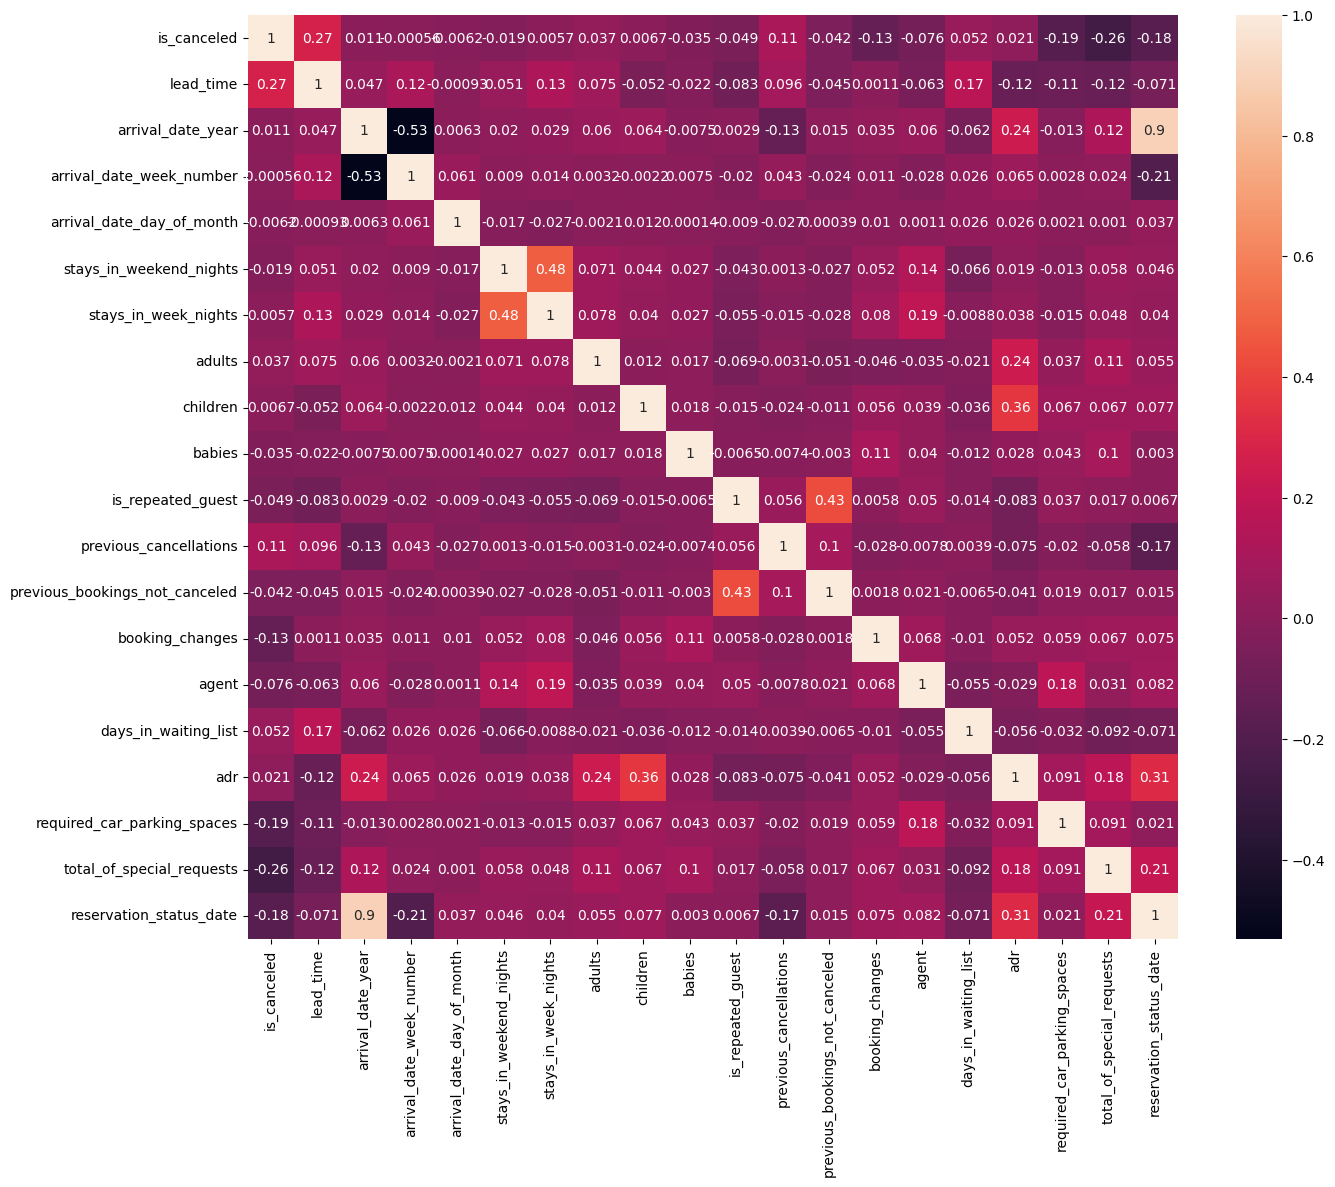

In [ ]:
df_numerical_features = ui2.select_dtypes(exclude='object')

plt.figure(figsize=(15,12))
sns.heatmap(df_numerical_features.corr(), annot=True)

# Boxplot Outliers

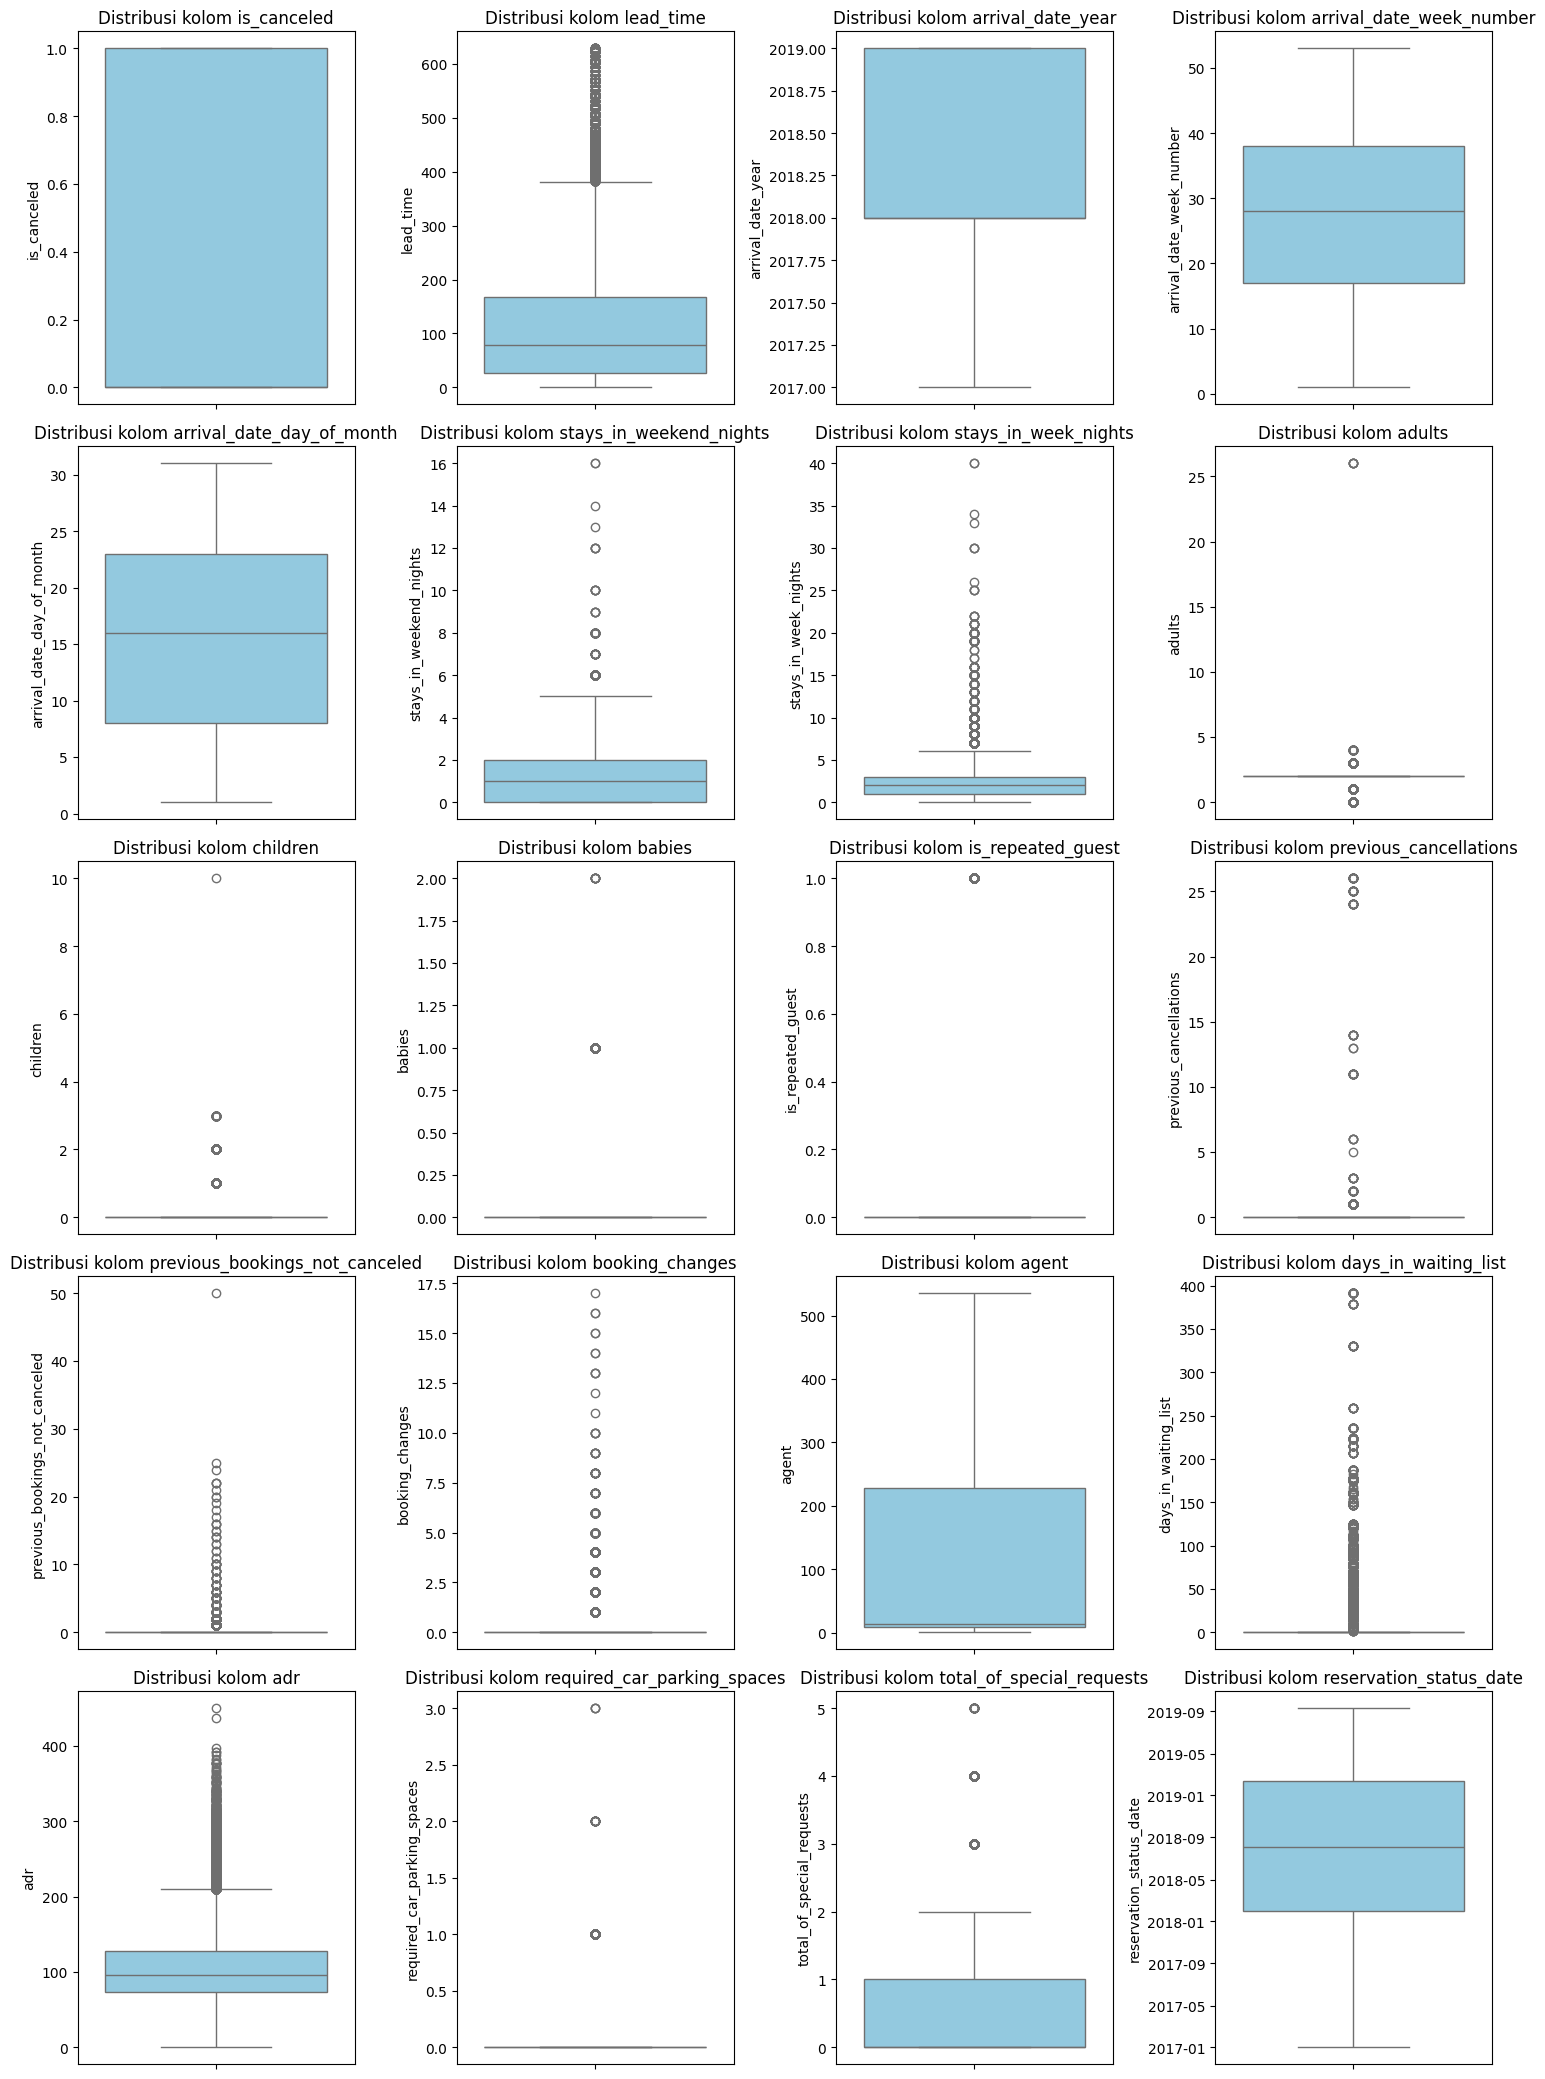

In [ ]:
plt.figure(1, figsize = (15,25))
n = 0
plot_kolom = ui2.select_dtypes(exclude = 'object').columns
jumlah_kolom = 4

for i in plot_kolom :
    n += 1
    plt.subplot(len(plot_kolom)  // jumlah_kolom + 1, jumlah_kolom, n)
    sns.boxplot(y = ui2[i], color = 'skyblue')
    plt.title("Distribusi kolom {}".format(i))
plt.tight_layout()
plt.show()

# Distribusi Data per Kolom

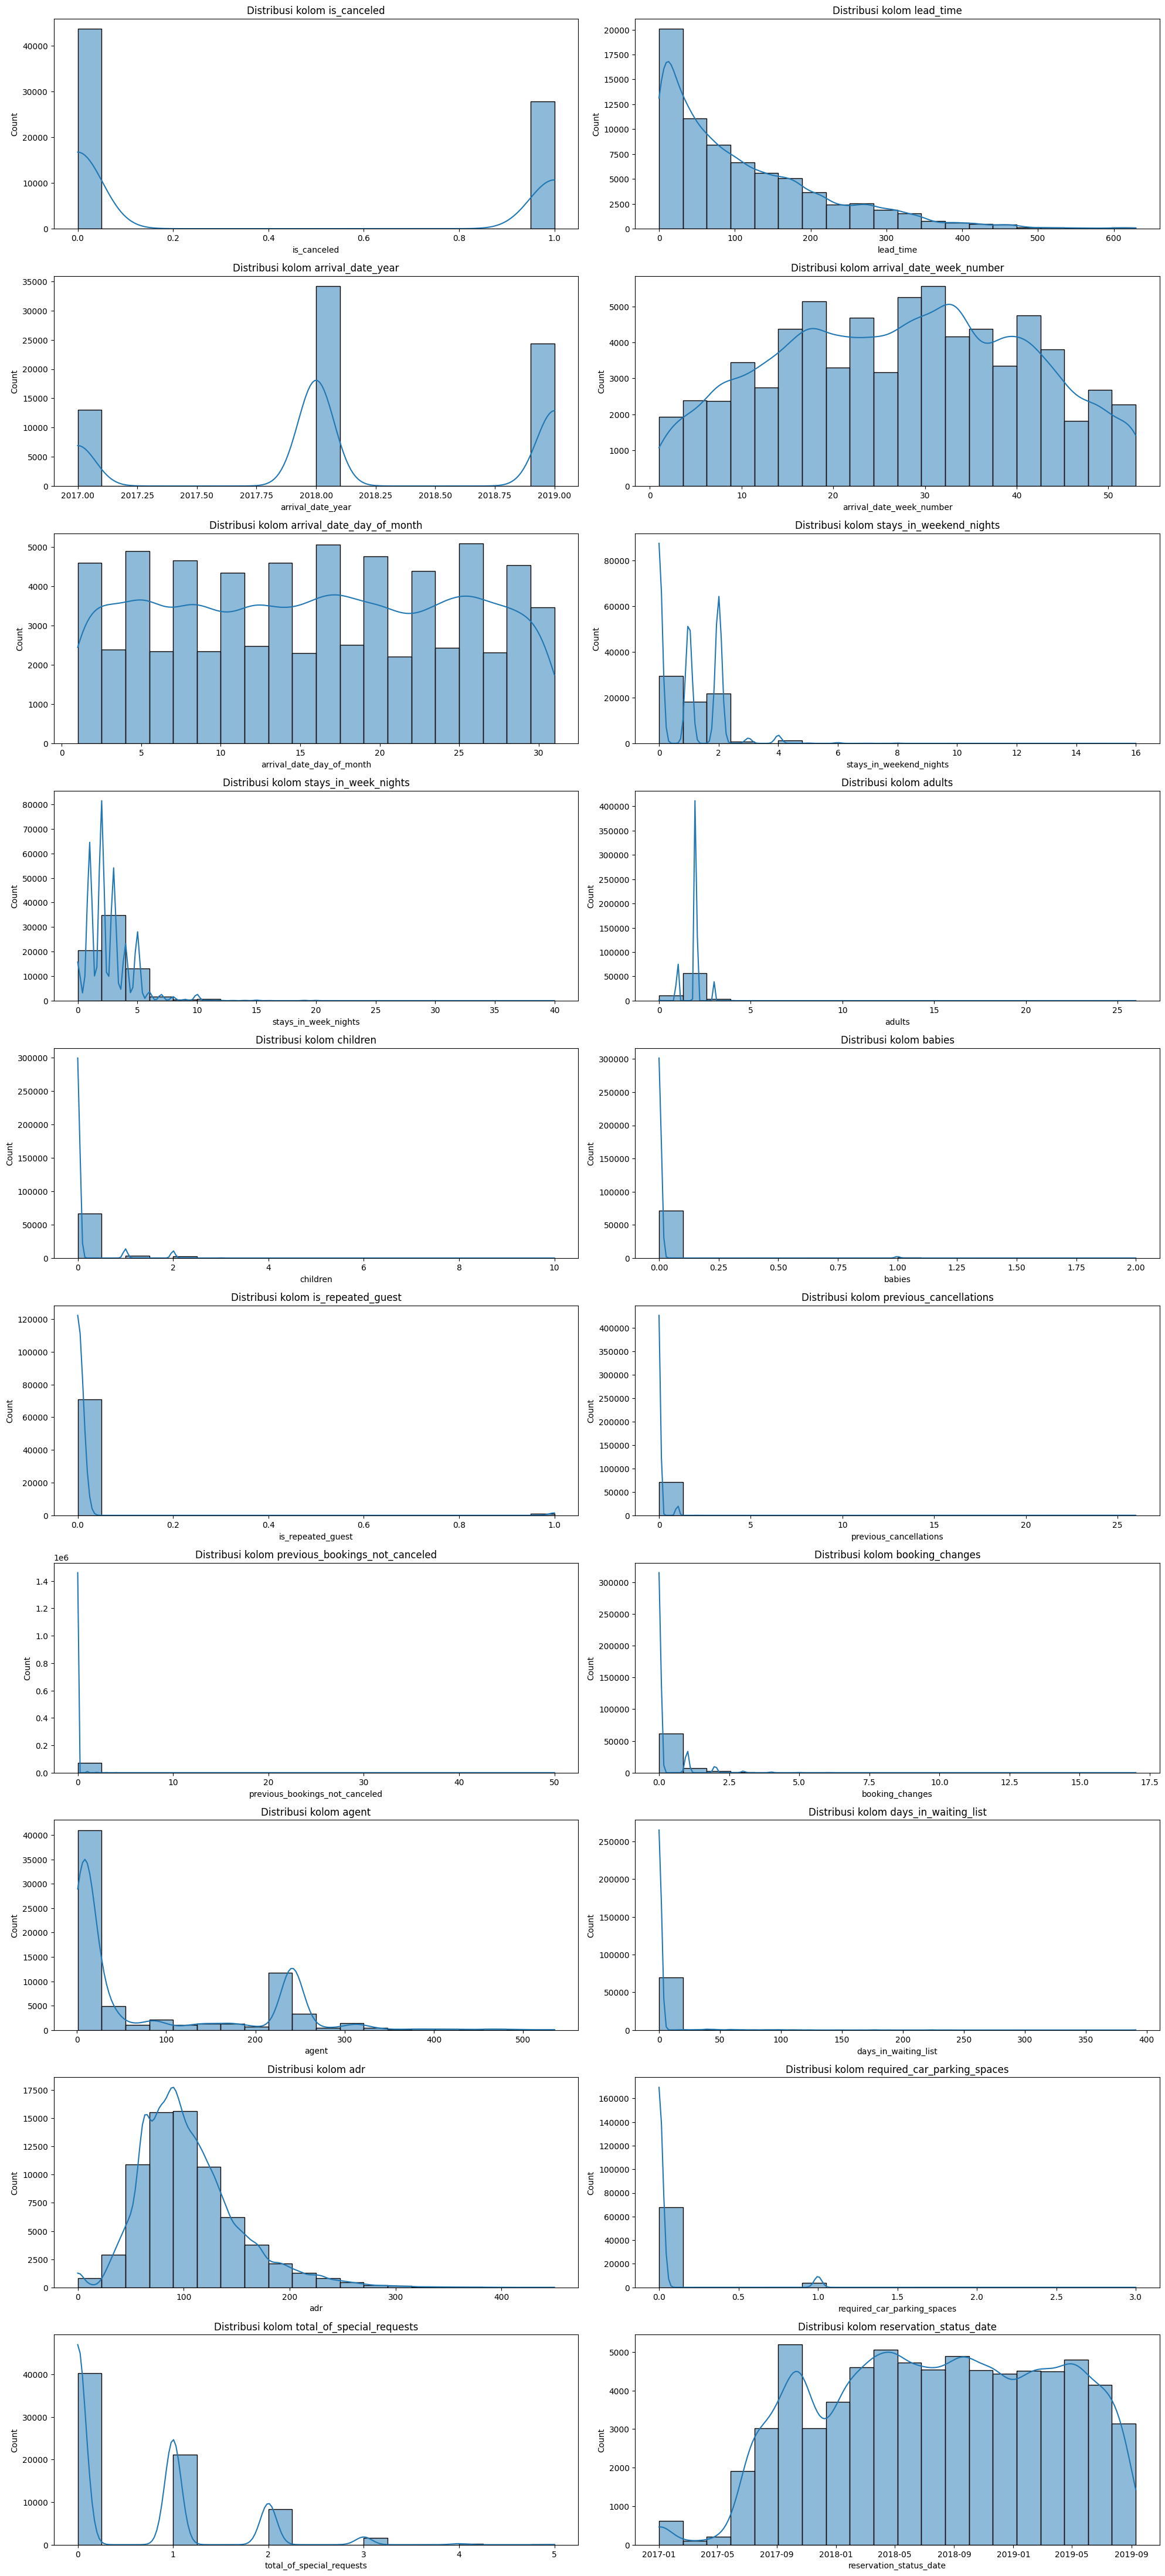

In [ ]:
# Cek distribusi data tiap kolom
plt.figure(1, figsize = (20,48))
n = 0
plot_kolom = ui2.select_dtypes(exclude = 'object').columns
jumlah_kolom = 2

for x in plot_kolom :
    n += 1
    plt.subplot(len(plot_kolom)  // jumlah_kolom + 1, jumlah_kolom, n)
    sns.histplot(ui2[x], bins = 20, kde = True)
    plt.title("Distribusi kolom {}".format(x))
plt.tight_layout()
plt.show()

# Rank Encoding

In [ ]:
makan = {
    'BB':1,
    'HB':2,
    'SC':3,
    'Undefined': 4,
    'FB' : 5,
}

In [ ]:
ui2['makan'] = ui2['meal'].map(makan)

In [ ]:
bulan = {
    'January':1,
    'February':2,
    'March':3,
    'April': 4,
    'May' : 5,
    'June' :6,
    'July' : 7,
    'August' : 8,
    'September' : 9,
    'October' : 10,
    'November' : 11,
    'December' : 12,
}

In [ ]:
ui2['bulan'] = ui2['arrival_date_month'].map(bulan)

In [ ]:
reservasi = {
    'A':1,
    'B':2,
    'C':3,
    'D': 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
    'H' : 8,
}

In [ ]:
ui2['reservasi_kamar'] = ui2['reserved_room_type'].map(reservasi)

In [ ]:
assign = {
    'A':1,
    'B':2,
    'C':3,
    'D': 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
    'H' : 8,
    'I' : 9,
    'K' : 10
}

In [ ]:
ui2['assigned_room'] = ui2['assigned_room_type'].map(assign)

# One Hot Encoding

In [ ]:
# OHE
ui2 = pd.get_dummies(data = ui2, columns = ['deposit_type', 'customer_type', 'market_segment', 'reservation_status', 'distribution_channel'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Buat label encoder
Label_encoder = LabelEncoder()
data_kol = ui2.select_dtypes(exclude = ['int', 'float']).columns
label_kol = list(data_kol)

#proses encoder
ui2[label_kol] = ui2[label_kol].apply(lambda col:Label_encoder.fit_transform(col))

In [ ]:
# ubah tipe data object ke date
ui2['reservation_status_date'] = pd.to_datetime(ui2['reservation_status_date'])

In [ ]:
ui2.drop(columns = ['reserved_room_type', 'meal', 'arrival_date_month', 'assigned_room_type', 'arrival_date_week_number', 'arrival_date_day_of_month', 'bulan', 'reservasi_kamar', 'reservation_status_Check-Out', 'assigned_room', 'reservation_status_Canceled', 'reservation_status_No-Show'], inplace = True)

# Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X = ui2.drop(['is_canceled', 'reservation_status_date'], axis = 1)
y = ui2['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=1000
)

In [ ]:
# check train data dimension
X_train.shape

(50140, 37)

In [ ]:
# check train target counts
y_train.value_counts()

,count
is_canceled,
0,30619
1,19521


In [ ]:
# check test target counts
y_test.value_counts()

,count
is_canceled,
0,13123
1,8366


In [ ]:
(8366/13123)*100

# 60:40

63.75066676826945

In [ ]:
# calculate VIF scores
# from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
# from statsmodels.tools.tools import add_constant

# Z = add_constant(X_train)
# vif_df = pd.DataFrame([vif(Z.values, i)
#                       for i in range(Z.shape[1])],
#                      index = Z.columns).reset_index()
# vif_df.columns = ['X', 'vif_score']
# vif_df = vif_df.loc[vif_df.X != 'const']
# vif_df

## EDA

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)

# create correlation matrix
train_df.corr().style.background_gradient(cmap='coolwarm')

,hotel,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,makan,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,is_canceled
hotel,1.000000,-0.006742,-0.001746,-0.003289,-0.000269,-0.001623,0.001351,0.001125,-0.001858,-0.006228,0.002876,0.003171,-0.001676,0.012991,-0.005377,-0.005571,-0.001858,0.002567,-0.005154,0.002599,-0.002630,0.000419,-0.002037,-0.000468,-0.004807,0.006218,-0.005658,0.002794,-0.001902,-0.004039,0.003444,0.003023,-0.002738,-0.000688,-0.003315,0.005984,0.002414,-0.002213
lead_time,-0.006742,1.000000,0.051527,0.051625,0.124040,0.076999,-0.051600,-0.017467,0.105837,-0.081704,0.094483,-0.043031,0.002990,-0.063597,0.170498,-0.117301,-0.105564,-0.118422,-0.046132,-0.388464,0.387932,0.017680,0.063977,-0.034284,-0.173305,0.161184,-0.015272,-0.028696,-0.060996,-0.099014,0.336055,0.121608,-0.284808,-0.056839,-0.091181,-0.035982,0.111509,0.275021
arrival_date_year,-0.001746,0.051527,1.000000,0.024147,0.030711,0.058127,0.060008,-0.006768,-0.176807,0.003570,-0.128020,0.014819,0.035016,0.060930,-0.062856,0.238623,-0.013773,0.121982,0.060418,0.098453,-0.098994,0.006115,-0.183750,-0.012937,0.268839,-0.197821,0.003851,0.000543,-0.046461,0.044557,-0.146570,-0.143995,0.213183,-0.041475,0.037488,0.019666,-0.021829,0.010583
stays_in_weekend_nights,-0.003289,0.051625,0.024147,1.000000,0.487354,0.069055,0.046347,0.029933,-0.112079,-0.044485,0.001493,-0.023119,0.048609,0.137950,-0.065209,0.021192,-0.009579,0.055484,0.009578,0.127681,-0.128629,0.011782,0.097276,-0.015098,0.028708,-0.074909,0.002891,-0.014195,-0.008938,0.016948,-0.079118,0.038568,0.018487,-0.009234,0.022752,-0.016567,-0.014979,-0.017811
stays_in_week_nights,-0.000269,0.124040,0.030711,0.487354,1.000000,0.079351,0.041947,0.031062,-0.098951,-0.051309,-0.009735,-0.024418,0.074437,0.184237,-0.009618,0.039559,-0.011371,0.044825,0.002992,0.103874,-0.105208,0.018397,0.132756,-0.017514,0.024133,-0.086632,-0.002737,-0.014172,0.012013,0.019946,-0.097659,0.077055,-0.005366,0.000497,0.030006,-0.021832,-0.024598,0.004894
adults,-0.001623,0.076999,0.058127,0.069055,0.079351,1.000000,0.012479,0.015462,-0.086772,-0.071104,-0.000486,-0.045425,-0.045536,-0.033716,-0.021080,0.231170,0.034892,0.110534,0.000430,0.040490,-0.040579,0.000420,0.007547,0.026964,0.129596,-0.147389,-0.027444,-0.031184,-0.081079,0.006748,-0.064106,-0.072405,0.120248,-0.092118,0.002691,-0.064973,0.042614,0.035280
children,0.001351,-0.051600,0.060008,0.046347,0.041947,0.012479,1.000000,0.018787,-0.028807,-0.014507,-0.023516,-0.010251,0.061058,0.040040,-0.036312,0.352494,0.065270,0.068158,-0.060906,0.100123,-0.100066,-0.003304,-0.020618,-0.005096,0.101719,-0.098321,-0.004146,0.001281,-0.020721,0.086227,-0.112167,-0.109323,0.134398,-0.027428,0.079929,-0.011237,-0.061713,0.005289
babies,0.001125,-0.017467,-0.006768,0.029933,0.031062,0.015462,0.018787,1.000000,0.001535,-0.004954,-0.006946,-0.002127,0.107299,0.036416,-0.011458,0.029040,0.039934,0.096100,0.014505,0.031613,-0.031549,-0.001768,0.002309,-0.002662,0.021001,-0.023174,-0.001305,0.012481,-0.004061,0.057417,-0.033345,-0.001292,-0.003220,-0.006723,0.056210,-0.003538,-0.048865,-0.035691
country,-0.001858,0.105837,-0.176807,-0.112079,-0.098951,-0.086772,-0.028807,0.001535,1.000000,0.074613,0.076528,0.034958,-0.040774,0.067705,0.077705,-0.109302,-0.015988,-0.166536,-0.056969,-0.362491,0.363391,-0.005371,0.009657,0.010228,-0.056059,0.053705,-0

In [ ]:
cat_cols = [x for x in X_train.columns if X_train[x].dtypes == "O"]
X_train  = pd.get_dummies(X_train, columns=cat_cols)
X_test  = pd.get_dummies(X_test, columns=cat_cols)

In [ ]:
# step ini hanya untuk training aja, karena ini jadi perbandingan apakah mencerminkan populasi atau tidak
from mrmr import mrmr_classif

list_keep = mrmr_classif(X = X_train, y = y_train, K = 10)

100%|██████████| 10/10 [00:02<00:00,  4.82it/s]


In [ ]:
X_train_new = X_train[list_keep]
X_test_new  = X_test[list_keep]

In [ ]:
# Kita oversampling dikarenakan terjadinya imbalance data dengan SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train = smote.fit_resample(X_train_new, y_train)

In [ ]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Logistic Regression
logreg_under = LogisticRegression(random_state=1000)
logreg_under.fit(X_train_over, y_train)
logreg_pred_under_test = logreg_under.predict(X_test_new)
logreg_pred_proba_under = logreg_under.predict_proba(X_test_new)

# Decision Tree
dt_under = DecisionTreeClassifier(random_state=1000)
dt_under.fit(X_train_over, y_train)
dt_pred_under_test = dt_under.predict(X_test_new)
dt_pred_proba_under = dt_under.predict_proba(X_test_new)

# Random Forest
rf_under = RandomForestClassifier(random_state=1000)
rf_under.fit(X_train_over, y_train)
rf_pred_under_test = rf_under.predict(X_test_new)
rf_pred_proba_under = rf_under.predict_proba(X_test_new)

# XGBoost
xgb_under = XGBClassifier(random_state = 1000)
xgb_under.fit(X_train_over, y_train)
xgb_pred_under_test = xgb_under.predict(X_test_new)
xgb_pred_proba_under = xgb_under.predict_proba(X_test_new)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, f1_score
from sklearn import metrics

# Evaluasi Undersampling model
eval_model_under = pd.DataFrame({
    'Model' : ['LogisticRegression',
              'DecisionTreeClassifier',
              'RandomForestClassifier',
              'XGBClassifier'],
    'Recall' : [recall_score(y_test, logreg_pred_under_test),
                recall_score(y_test, dt_pred_under_test),
                recall_score(y_test, rf_pred_under_test),
                recall_score(y_test, xgb_pred_under_test),
               ],
    'AUC' : [roc_auc_score(y_test, logreg_pred_under_test),
                roc_auc_score(y_test, dt_pred_under_test),
                roc_auc_score(y_test, rf_pred_under_test),
                roc_auc_score(y_test, xgb_pred_under_test),
               ],
    'F1 Score' : [f1_score(y_test, logreg_pred_under_test),
                f1_score(y_test, dt_pred_under_test),
                f1_score(y_test, rf_pred_under_test),
                f1_score(y_test, xgb_pred_under_test),
               ],
    'Precision' : [precision_score(y_test, logreg_pred_under_test),
                precision_score(y_test, dt_pred_under_test),
                precision_score(y_test, rf_pred_under_test),
                precision_score(y_test, xgb_pred_under_test),
               ],
    'Accuracy' : [accuracy_score(y_test, logreg_pred_under_test),
                accuracy_score(y_test, dt_pred_under_test),
                accuracy_score(y_test, rf_pred_under_test),
                accuracy_score(y_test, xgb_pred_under_test),
               ],
})

In [ ]:
print(eval_model_under)

                    Model    Recall       AUC  F1 Score  Precision  Accuracy
0      LogisticRegression  0.658857  0.729985  0.668607   0.678651  0.745730
1  DecisionTreeClassifier  0.743366  0.778374  0.730187   0.717467  0.786123
2  RandomForestClassifier  0.761774  0.785901  0.739670   0.718813  0.791242
3           XGBClassifier  0.771814  0.789778  0.744494   0.719042  0.793755


In [ ]:
# random forest prediction result
pd.DataFrame(metrics.classification_report(y_test, xgb_pred_under_test, target_names=['0','1'], output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.847390,0.719042,0.793755,0.783216,0.797422
recall,0.807742,0.771814,0.793755,0.789778,0.793755
f1-score,0.827091,0.744494,0.793755,0.785793,0.794935
support,13123.000000,8366.000000,0.793755,21489.000000,21489.000000


## Baseline Model

In [ ]:
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Logistic Regression
logreg = LogisticRegression(random_state=1000)
logreg.fit(X_train_new, y_train)
logreg_pred_test = logreg.predict(X_test_new)

# Decision Tree
dt = DecisionTreeClassifier(random_state=1000)
dt.fit(X_train_new,y_train)
dt_pred_test = dt.predict(X_test_new)

# Random Forest
rf = RandomForestClassifier(random_state=1000)
rf.fit(X_train_new, y_train)
rf_pred_test = rf.predict(X_test_new)

# XGBoost
xgb = XGBClassifier(random_state = 1000)
xgb.fit(X_train_new, y_train)
xgb_pred_test = xgb.predict(X_test_new)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score, f1_score
from sklearn import metrics

# Evaluasi
eval_model = pd.DataFrame({
    'Model' : ['LogisticRegression',
              'DecisionTreeClassifier',
              'RandomForestClassifier',
              'XGBClassifier'],
    'Recall' : [recall_score(y_test, logreg_pred_test),
                recall_score(y_test, dt_pred_test),
                recall_score(y_test, rf_pred_test),
                recall_score(y_test, xgb_pred_test),
               ],
    'AUC' : [roc_auc_score(y_test, logreg_pred_test),
                roc_auc_score(y_test, dt_pred_test),
                roc_auc_score(y_test, rf_pred_test),
                roc_auc_score(y_test, xgb_pred_test),
               ],
    'F1 Score' : [f1_score(y_test, logreg_pred_test),
                f1_score(y_test, dt_pred_test),
                f1_score(y_test, rf_pred_test),
                f1_score(y_test, xgb_pred_test),
               ],
    'Precision' : [precision_score(y_test, logreg_pred_test),
                precision_score(y_test, dt_pred_test),
                precision_score(y_test, rf_pred_test),
                precision_score(y_test, xgb_pred_test),
               ],
    'Accuracy' : [accuracy_score(y_test, logreg_pred_test),
                accuracy_score(y_test, dt_pred_test),
                accuracy_score(y_test, rf_pred_test),
                accuracy_score(y_test, xgb_pred_test),
               ],
})

## Evaluation Metrics Baseline Model

In [ ]:
print(eval_model)

                    Model    Recall       AUC  F1 Score  Precision  Accuracy
0      LogisticRegression  0.534306  0.717355  0.632115   0.773758  0.757876
1  DecisionTreeClassifier  0.686350  0.772040  0.718873   0.754633  0.791009
2  RandomForestClassifier  0.710256  0.781555  0.731818   0.754731  0.797338
3           XGBClassifier  0.666627  0.779134  0.725936   0.796828  0.804039


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

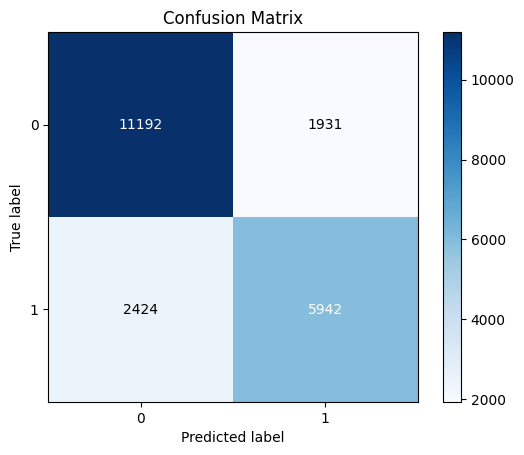

In [ ]:
# metrics Random Forest
skplt.metrics.plot_confusion_matrix(y_test, rf_pred_test)

TP = 5942 | FP = 1931 | FN = 2424 | TN = 11192

Yang diprediksi cancel namun sebenarnya tidak yaitu 1931 customer tetapi yang diprediksi tidak cancel namun aslinya cancel sebanyan 2424 customer

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

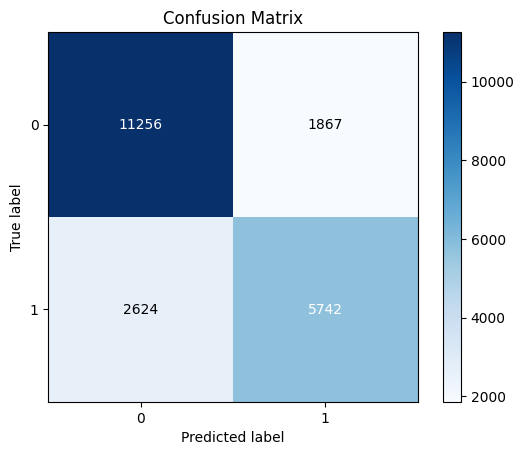

In [ ]:
# metrics Decision Tree
skplt.metrics.plot_confusion_matrix(y_test, dt_pred_test)

TP = 5742 | FP = 1867 | FN = 2624 | TN = 11256

Yang diprediksi cancel namun sebenarnya tidak yaitu 1867 customer tetapi yang diprediksi tidak cancel namun aslinya cancel sebanyan 2624 customer

## Hyperparameter Tunning Model

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

logreg = LogisticRegression()
logreg_grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
logreg_grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
# the complete results
pd.DataFrame(logreg_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.621585,0.761222,0.008160,0.003091,0.1,l1,liblinear,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.760570,0.762565,0.753789,0.757778,0.758177,0.758576,0.002953,2
1,1.881126,0.398283,0.004646,0.000283,0.1,l1,saga,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.758277,0.761468,0.754487,0.754886,0.750199,0.755864,0.003799,12
2,0.205310,0.007693,0.004445,0.000132,0.1,l2,liblinear,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.760670,0.762665,0.753889,0.757878,0.758377,0.758696,0.002950,1
3,1.141359,0.028337,0.005008,0.001106,0.1,l2,saga,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.758177,0.761568,0.754687,0.755185,0.750199,0.755963,0.003789,10
4,0.576789,0.449932,0.005349,0.001817,1,l1,liblinear,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.760172,0.762565,0.753989,0.757878,0.758277,0.758576,0.002831,3
5,1.716169,0.409801,0.005205,0.001975,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.758077,0.761667,0.754986,0.755086,0.750199,0.756003,0.003793,9
6,0.205613,0.005533,0.004312,0.000044,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.760072,0.761867,0.753889,0.757679,0.758077,0.758317,0.002674,6
7,1.312231,0.273083,0.005526,0.002210,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.758476,0.761568,0.754787,0.755086,0.750199,0.756023,0.003823,8
8,1.529490,1.273184,0.006076,0.003246,10,l1,liblinear,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.760072,0.762266,0.754089,0.757479,0.758277,0.758436,0.002727,4
9,1.471154,0.239235,0.005233,0.001885,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.758576,0.761568,0.754986,0.755285,0.750199,0.756123,0.003814,7


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(logreg_grid_search.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline...",0.758576,2
1,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.755864,12
2,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline...",0.758696,1
3,"{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}",0.755963,10
4,"{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}",0.758576,3
5,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.756003,9
6,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.758317,6
7,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.756023,8
8,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}",0.758436,4
9,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.756123,7


In [ ]:
# random forest
rf_param_grid = {
    'n_estimators': [10,20,30,40,50],
    'max_depth': [1,2,3,4,5]
}

rf = RandomForestClassifier()
rf_grid_search = GridSearchCV(rf, rf_param_grid, cv=5, scoring='recall')
rf_grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='recall')

In [ ]:
# the complete results
pd.DataFrame(rf_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.334721,0.167180,0.062178,0.032067,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.317879,0.331967,0.301742,0.311475,0.306530,0.313919,0.010491,25
1,0.250574,0.038017,0.026155,0.000395,1,20,"{'max_depth': 1, 'n_estimators': 20}",0.318391,0.331967,0.301486,0.311988,0.306274,0.314021,0.010606,19
2,0.349662,0.017932,0.035594,0.003250,1,30,"{'max_depth': 1, 'n_estimators': 30}",0.318135,0.332223,0.301486,0.311988,0.306274,0.314021,0.010673,19
3,0.388831,0.066653,0.033008,0.005398,1,40,"{'max_depth': 1, 'n_estimators': 40}",0.317879,0.332223,0.301742,0.311988,0.306530,0.314072,0.010557,18
4,0.370103,0.004341,0.032567,0.000904,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.318391,0.331967,0.301486,0.311732,0.306274,0.313970,0.010616,24
5,0.092651,0.002456,0.013982,0.000195,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.318391,0.332223,0.301998,0.311988,0.306274,0.314175,0.010574,13
6,0.179733,0.007279,0.020486,0.001155,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.317879,0.332223,0.301742,0.359375,0.306274,0.323499,0.020808,12
7,0.288883,0.054941,0.027954,0.005261,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.318135,0.332223,0.301998,0.311988,0.306274,0.314124,0.010554,14
8,0.516834,0.010670,0.041807,0.001335,2,40,"{'max_depth': 2, 'n_estimators': 40}",0.317879,0.332223,0.301998,0.311988,0.306530,0.314124,0.010497,15
9,0.614181,0.093217,0.045234,0.005737,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.318135,0.332223,0.301742,0.311988,0.306274,0.314072,0.010613,16


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(rf_grid_search.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.313919,25
1,"{'max_depth': 1, 'n_estimators': 20}",0.314021,19
2,"{'max_depth': 1, 'n_estimators': 30}",0.314021,19
3,"{'max_depth': 1, 'n_estimators': 40}",0.314072,18
4,"{'max_depth': 1, 'n_estimators': 50}",0.313970,24
5,"{'max_depth': 2, 'n_estimators': 10}",0.314175,13
6,"{'max_depth': 2, 'n_estimators': 20}",0.323499,12
7,"{'max_depth': 2, 'n_estimators': 30}",0.314124,14
8,"{'max_depth': 2, 'n_estimators': 40}",0.314124,15
9,"{'max_depth': 2, 'n_estimators': 50}",0.314072,16


In [ ]:
dt_param_grid = {
    'max_depth': [1,2,3,4,5]
}

dt = DecisionTreeClassifier()
dt_grid_search = GridSearchCV(dt, dt_param_grid, cv=5, scoring='recall')
dt_grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5]}, scoring='recall')

In [ ]:
# the complete results
pd.DataFrame(dt_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.013386,0.000105,0.007456,0.000147,1,{'max_depth': 1},0.317879,0.331455,0.301486,0.311475,0.306274,0.313714,0.010411,4
1,0.019351,0.001693,0.007655,0.000151,2,{'max_depth': 2},0.316342,0.330943,0.300973,0.310963,0.305762,0.312997,0.010337,5
2,0.024567,0.001186,0.008023,0.000271,3,{'max_depth': 3},0.597848,0.613473,0.301486,0.605277,0.584123,0.540441,0.119867,3
3,0.032867,0.005095,0.008468,0.000535,4,{'max_depth': 4},0.597848,0.613473,0.609887,0.605277,0.584123,0.602122,0.010405,1
4,0.037136,0.002241,0.009198,0.000885,5,{'max_depth': 5},0.574283,0.584273,0.583248,0.582480,0.561332,0.577123,0.008657,2


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(dt_grid_search.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'max_depth': 1},0.313714,4
1,{'max_depth': 2},0.312997,5
2,{'max_depth': 3},0.540441,3
3,{'max_depth': 4},0.602122,1
4,{'max_depth': 5},0.577123,2


In [ ]:
xgb_param_grid = {
    'n_estimators': [10,20,30,40,50],
    'max_depth': [1,2,3,4,5]
}

xgb_clf = XGBClassifier()
xgb_grid_search = GridSearchCV(xgb_clf, xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train_new, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 20, 30, 40, 50]},
             scoring='accuracy')

In [ ]:
# the complete results
pd.DataFrame(xgb_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058628,0.001845,0.010050,0.000242,1,10,"{'max_depth': 1, 'n_estimators': 10}",0.733746,0.738931,0.727663,0.731552,0.729158,0.732210,0.003949,25
1,0.080092,0.008578,0.010695,0.001083,1,20,"{'max_depth': 1, 'n_estimators': 20}",0.752094,0.756980,0.750698,0.753091,0.749701,0.752513,0.002517,24
2,0.088197,0.005419,0.011258,0.001400,1,30,"{'max_depth': 1, 'n_estimators': 30}",0.755983,0.763861,0.752294,0.755385,0.755784,0.756661,0.003841,22
3,0.105147,0.011060,0.011341,0.001084,1,40,"{'max_depth': 1, 'n_estimators': 40}",0.758975,0.768947,0.761069,0.771739,0.755086,0.763163,0.006232,21
4,0.111448,0.002836,0.011347,0.000399,1,50,"{'max_depth': 1, 'n_estimators': 50}",0.777024,0.785600,0.773434,0.777523,0.767651,0.776247,0.005857,19
5,0.061846,0.001770,0.011986,0.003392,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.761368,0.768748,0.742521,0.753091,0.750598,0.755265,0.009033,23
6,0.076777,0.002113,0.010648,0.000277,2,20,"{'max_depth': 2, 'n_estimators': 20}",0.774930,0.782310,0.775828,0.775429,0.774830,0.776665,0.002845,18
7,0.098401,0.009610,0.012171,0.001065,2,30,"{'max_depth': 2, 'n_estimators': 30}",0.780913,0.786398,0.780315,0.783406,0.779517,0.782110,0.002508,16
8,0.112666,0.005589,0.012444,0.001368,2,40,"{'max_depth': 2, 'n_estimators': 40}",0.787894,0.791484,0.790886,0.790287,0.778819,0.787874,0.004689,13
9,0.478123,0.356250,0.018019,0.004166,2,50,"{'max_depth': 2, 'n_estimators': 50}",0.791683,0.792880,0.790088,0.795473,0.781113,0.790247,0.004894,11


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(xgb_grid_search.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,"{'max_depth': 1, 'n_estimators': 10}",0.732210,25
1,"{'max_depth': 1, 'n_estimators': 20}",0.752513,24
2,"{'max_depth': 1, 'n_estimators': 30}",0.756661,22
3,"{'max_depth': 1, 'n_estimators': 40}",0.763163,21
4,"{'max_depth': 1, 'n_estimators': 50}",0.776247,19
5,"{'max_depth': 2, 'n_estimators': 10}",0.755265,23
6,"{'max_depth': 2, 'n_estimators': 20}",0.776665,18
7,"{'max_depth': 2, 'n_estimators': 30}",0.782110,16
8,"{'max_depth': 2, 'n_estimators': 40}",0.787874,13
9,"{'max_depth': 2, 'n_estimators': 50}",0.790247,11


In [ ]:
#Logistic Regression
logreg_tun = LogisticRegression(random_state=1000, C = 10, penalty = 'l2', solver = 'liblinear')
logreg_tun.fit(X_train_new, y_train)
logreg_pred_tunning_test = logreg_tun.predict(X_test_new)

# Decision Tree
dt_tun = DecisionTreeClassifier(random_state=1000, max_depth = 5)
dt_tun.fit(X_train_new, y_train)
dt_pred_tunning_test = dt_tun.predict(X_test_new)

# Random Forest
rf_tun = RandomForestClassifier(random_state=1000, max_depth = 5, n_estimators = 30)
rf_tun.fit(X_train_new, y_train)
rf_pred_tunning_test = rf_tun.predict(X_test_new)

# XGBoost
xgb_tun = XGBClassifier(random_state = 1000, max_depth = 5,  n_estimators = 30)
xgb_tun.fit(X_train_new, y_train)
xgb_pred_tunning_test = xgb_tun.predict(X_test_new)

In [ ]:
# Evaluasi Tunning model
eval_model_tunning = pd.DataFrame({
    'Model' : ['LogisticRegression',
              'DecisionTreeClassifier',
              'RandomForestClassifier',
              'XGBClassifier'],
    'Recall' : [recall_score(y_test, logreg_pred_tunning_test),
                recall_score(y_test, dt_pred_tunning_test),
                recall_score(y_test, rf_pred_tunning_test),
                recall_score(y_test, xgb_pred_tunning_test),
               ],
    'AUC' : [roc_auc_score(y_test, logreg_pred_tunning_test),
                roc_auc_score(y_test, dt_pred_tunning_test),
                roc_auc_score(y_test, rf_pred_tunning_test),
                roc_auc_score(y_test, xgb_pred_tunning_test),
               ],
    'F1 Score' : [f1_score(y_test, logreg_pred_tunning_test),
                f1_score(y_test, dt_pred_tunning_test),
                f1_score(y_test, rf_pred_tunning_test),
                f1_score(y_test, xgb_pred_tunning_test),
               ],
    'Precision' : [precision_score(y_test, logreg_pred_tunning_test),
                precision_score(y_test, dt_pred_tunning_test),
                precision_score(y_test, rf_pred_tunning_test),
                precision_score(y_test, xgb_pred_tunning_test),
               ],
    'Accuracy' : [accuracy_score(y_test, logreg_pred_tunning_test),
                accuracy_score(y_test, dt_pred_tunning_test),
                accuracy_score(y_test, rf_pred_tunning_test),
                accuracy_score(y_test, xgb_pred_tunning_test),
               ]
})

## Evaluation Matrics Hyperarameter Tunning

In [ ]:
print(eval_model_tunning)

                    Model    Recall       AUC  F1 Score  Precision  Accuracy
0      LogisticRegression  0.533947  0.717518  0.632227   0.774848  0.758155
1  DecisionTreeClassifier  0.570284  0.723419  0.646608   0.746519  0.757318
2  RandomForestClassifier  0.446569  0.704349  0.593063   0.882589  0.761413
3           XGBClassifier  0.660053  0.773942  0.719010   0.789534  0.799153


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

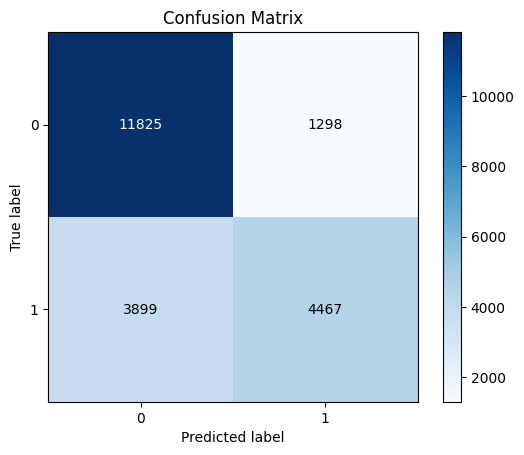

In [ ]:
# metrics Decision Tree
skplt.metrics.plot_confusion_matrix(y_test, logreg_pred_tunning_test)

TP = 4467 | FP = 1298 | FN = 3899 | TN = 11825

Yang diprediksi cancel namun sebenarnya tidak yaitu 1298 customer tetapi yang diprediksi tidak cancel namun aslinya cancel sebanyan 3899 customer

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

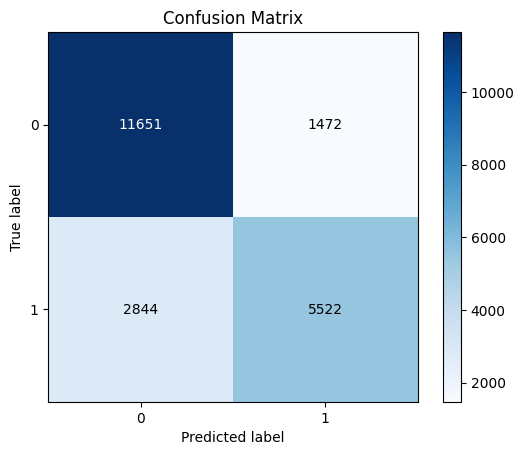

In [ ]:
# metrics XGBoost
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred_tunning_test)

TP = 6474 | FP = 1472 | FN = 2844 | TN = 10396

Yang diprediksi cancel namun sebenarnya tidak yaitu 1472 customer tetapi yang diprediksi tidak cancel namun aslinya cancel sebanyan 2844 customer

## Under sampling Model

In [ ]:
from sklearn.model_selection import train_test_split

X = ui2.drop(['is_canceled', 'reservation_status_date'], axis = 1)
y = ui2['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    stratify = y,
    random_state=1000
)

In [ ]:
from mrmr import mrmr_classif

list_keep = mrmr_classif(X = X_train, y = y_train, K = 10)

100%|██████████| 10/10 [00:01<00:00,  5.87it/s]


In [ ]:
X_train_new = X_train[list_keep]
X_test_new  = X_test[list_keep]

In [ ]:
# Kita oversampling dikarenakan terjadinya imbalance data dengan SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_over, y_train = smote.fit_resample(X_train_new, y_train)

In [ ]:
#Logistic Regression
logreg_under = LogisticRegression(random_state=1000)
logreg_under.fit(X_train_over, y_train)
logreg_pred_under_test = logreg_under.predict(X_test_new)
logreg_pred_proba_under = logreg_under.predict_proba(X_test_new)

# Decision Tree
dt_under = DecisionTreeClassifier(random_state=1000)
dt_under.fit(X_train_over, y_train)
dt_pred_under_test = dt_under.predict(X_test_new)
dt_pred_proba_under = dt_under.predict_proba(X_test_new)

# Random Forest
rf_under = RandomForestClassifier(random_state=1000)
rf_under.fit(X_train_over, y_train)
rf_pred_under_test = rf_under.predict(X_test_new)
rf_pred_proba_under = rf_under.predict_proba(X_test_new)

# XGBoost
xgb_under = XGBClassifier(random_state = 1000)
xgb_under.fit(X_train_over, y_train)
xgb_pred_under_test = xgb_under.predict(X_test_new)
xgb_pred_proba_under = xgb_under.predict_proba(X_test_new)

In [ ]:
# Evaluasi Undersampling model
eval_model_under = pd.DataFrame({
    'Model' : ['LogisticRegression',
              'DecisionTreeClassifier',
              'RandomForestClassifier',
              'XGBClassifier'],
    'Recall' : [recall_score(y_test, logreg_pred_under_test),
                recall_score(y_test, dt_pred_under_test),
                recall_score(y_test, rf_pred_under_test),
                recall_score(y_test, xgb_pred_under_test),
               ],
    'AUC' : [roc_auc_score(y_test, logreg_pred_under_test),
                roc_auc_score(y_test, dt_pred_under_test),
                roc_auc_score(y_test, rf_pred_under_test),
                roc_auc_score(y_test, xgb_pred_under_test),
               ],
    'F1 Score' : [f1_score(y_test, logreg_pred_under_test),
                f1_score(y_test, dt_pred_under_test),
                f1_score(y_test, rf_pred_under_test),
                f1_score(y_test, xgb_pred_under_test),
               ],
    'Precision' : [precision_score(y_test, logreg_pred_under_test),
                precision_score(y_test, dt_pred_under_test),
                precision_score(y_test, rf_pred_under_test),
                precision_score(y_test, xgb_pred_under_test),
               ],
    'Accuracy' : [accuracy_score(y_test, logreg_pred_under_test),
                accuracy_score(y_test, dt_pred_under_test),
                accuracy_score(y_test, rf_pred_under_test),
                accuracy_score(y_test, xgb_pred_under_test),
               ],
})

## Evaluation Metrics Undersampling Model


In [ ]:
print(eval_model_under)

                    Model    Recall       AUC  F1 Score  Precision  Accuracy
0      LogisticRegression  0.658857  0.729985  0.668607   0.678651  0.745730
1  DecisionTreeClassifier  0.743366  0.778374  0.730187   0.717467  0.786123
2  RandomForestClassifier  0.761774  0.785901  0.739670   0.718813  0.791242
3           XGBClassifier  0.771814  0.789778  0.744494   0.719042  0.793755


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

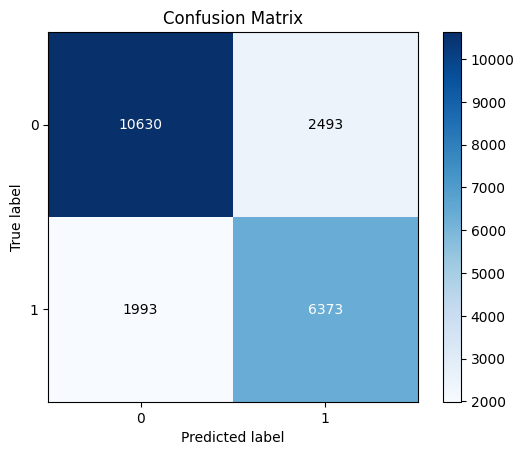

In [ ]:
# metrics Random Forest
skplt.metrics.plot_confusion_matrix(y_test, rf_pred_under_test)

TP = 6373 | FP = 2493 | FN = 1993 | TN = 10630

Yang diprediksi cancel namun sebenarnya tidak yaitu 2493 customer tetapi yang diprediksi tidak cancel namun aslinya cancel sebanyan 1993 customer

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

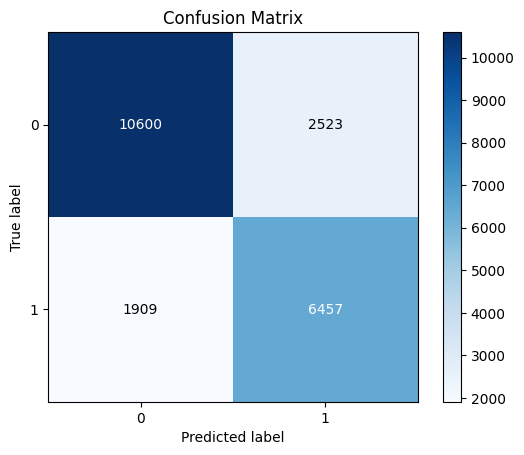

In [ ]:
# metrics XGBoost
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred_under_test)

TP = 6457 | FP = 2523 | FN = 1909 | TN = 10600

Yang diprediksi cancel namun sebenarnya tidak yaitu 2523 customer tetapi yang diprediksi tidak cancel namun aslinya cancel sebanyan 1909 customer

# Evaluasi Model
- Precision: Tinggi precision berarti sedikit false positive. Misalnya, dalam kasus deteksi penyakit, precision yang tinggi berarti model jarang salah mendeteksi penyakit pada pasien yang sebenarnya sehat.

- Recall: Tinggi recall berarti sedikit false negative. Misalnya, dalam kasus deteksi penyakit, recall yang tinggi berarti model jarang melewatkan pasien yang benar-benar sakit.

**MODEL EVALUASI Baseline**

Model dengan precision yang tinggi dan Recall yang tinggi yaitu Random Forest (75% dan 71%) dan Decision Tree (75% dan 68%)

- **Random Forest** memiliki recall 71% yaitu model berhasil menemukan customer cancel sebesar 71% dengan benar dan Precision sebesar 75% dimana model 75% memprediksi dengan baik yaitu bisa memprediksi customer yang benar-benar cancel

- **XGBoost** memiliki recall 68% yaitu modelnya berhasil menemukan customer cancel sebesar 68% dengan benar dan Precisionnya sebesar 75% dimana modelnya memprediksi 75% dengan baik yaitu bisa memprediksi customer yang benar-benar cancel

**MODEL EVALUASI Oversampling**

Model dengan precision yang tinggi dan Recall yang tinggi yaitu Random Forest (72% dan 76%) dan XGBoost (72% dan 77%)

- **Random Forest** memiliki recall 76% yaitu model berhasil menemukan customer cancel sebesar 76% dengan benar dan Precision sebesar 72% dimana model 72% memprediksi dengan baik yaitu bisa memprediksi customer yang benar-benar cancel

- **XGBoost** memiliki recall 77% yaitu modelnya berhasil menemukan customer cancel sebesar 77% dengan benar dan Precisionnya sebesar 72% dimana modelnya memprediksi 72% dengan baik yaitu bisa memprediksi customer yang benar-benar cancel

**MODEL EVALUASI Tunning**

Model dengan precision yang tinggi dan Recall yang tinggi yaitu LogisticRegression (77% dan 53%) dan XGBoost (78% dan 66%)

- Logistic Regression memiliki recall 53% yaitu model hanya berhasil menemukan customer cancel sebesar 53% dengan benar dan Precision sebesar 77% memprediksi dengan baik dimana bisa memprediksi customer yang benar-benar cancel

- XGBoost memiliki recall 66% yaitu modelnya berhasil menemukan customer cancel sebesar 66% dengan benar dan Precisionnya sebesar 78% dimana modelnya memprediksi 78% dengan baik dimana bisa memprediksi customer yang benar-benar cancel

**BEST MODEL**

Model terbaik yang dipilih yaitu model dengan teknik oversampling dikarenakan jumlah data yang imbalance dan tidak mungkin untuk di undersampling dikarenakan jumlah data yang tidak banyak dan lebih aman untuk pemodelan karena tidak menghilangkan data asli (informasi penting). Dengan mempertimbangkan hasil metrik recall dan precision untuk meminimalisir gagal prediksi dan sensivitas model terhadap data maka model Random Forest dan XGBoost cocok untuk prediksi dataset ini.

# Model Agnostic Method

In [ ]:
# import dalex to explain complex model
import dalex as dx

In [ ]:
## initiate explainer for Random Forest model
cancel_rf_exp = dx.Explainer(rf_under, X_train_over, y_train, label = "RF Interpretation")
## initiate explainer for XGBoost model
cancel_xgb_exp = dx.Explainer(xgb_under, X_train_over, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 61238 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 61238 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RF Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f37a43c8ca0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.502, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.974, mean = -0.00162, max = 0.971
  -> model_info        : package sklearn

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 61238 rows 10 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted t

## Feature Importance

In [ ]:
# visualizer permutation feature importance for Random Forest Model
cancel_rf_exp.model_parts().plot()

In [ ]:
# visualizer permutation feature importance for Random Forest Model
cancel_xgb_exp.model_parts().plot()

## Partial Dependence Plot

In [ ]:
# create partial dependence plot of Random Forest model
cancel_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 10/10 [00:03<00:00,  3.21it/s]


In [ ]:
# create partial dependence plot of XGBoost model
cancel_xgb_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 10/10 [00:00<00:00, 14.78it/s]


# Deep Dive Data

In [ ]:
copy_ui.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,bookingID
count,71629.000000,71629.000000,71629.000000,71629.000000,71629.000000,71629.000000,71629.000000,71629.000000,71629.000000,71629.000000,...,71629.000000,71629.000000,71629.000000,71629.0,71629.000000,71629.000000,71629.000000,71629.000000,71629,71629.000000
mean,0.389326,111.744992,2018.157548,27.371400,15.762806,0.980888,2.592023,1.900138,0.111198,0.007581,...,0.075668,0.025074,0.202167,86.760991,2.639420,104.684597,0.052423,0.606109,2018-07-30 08:05:07.182844928,41661.334473
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,2017-01-01 00:00:00,1.000000
25%,0.000000,26.000000,2018.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.0,0.000000,73.080000,0.000000,0.000000,2018-01-31 00:00:00,20855.000000
50%,0.000000,79.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.0,0.000000,96.300000,0.000000,0.000000,2018-08-04 00:00:00,41620.000000
75%,1.000000,168.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.0,0.000000,127.800000,0.000000,1.000000,2019-02-12 00:00:00,62504.000000
max,1.000000,629.000000,2019.000000,53.000000,31.000000,16.000000,40.000000,26.000000,10.000000,2.000000,...,26.000000,50.000000,17.000000,535.0,391.000000,450.000000,3.000000,5.000000,2019-09-10 00:00:00,83293.000000
std,0.487601,107.755635,0.705497,13.293009,8.783952,1.006283,1.911390,0.501028,0.412794,0.088016,...,0.772513,0.453250,0.621233,110.850228,19.032775,46.992163,0.224378,0.800287,NaN,24039.784865


Informasi :
- Rata-rata jarak antara waktu reservasi room dengan kedatangan 111 hari
- Pengunjung biasanya menginap 1 malam pada weekend dan 2 malam pada weekday
- Segmentasi usia pengunjung saat menginap untuk dewasa sebanyak 1-2 orang, dan jarang membawa anak/bayi (rata2 untuk children 1 orang dan bayi bahkan jarang)
- Rata-rata pengunjung masuk kedalam waiting list selama 2 hari dan maksimal 19 hari. Dengan maksimal 19 hari bisa dipastikan terjadi karena peak season (musim libur), customer meminta spesifik tipe kamar atau bahkan terjadi perpanjangan menginap oleh tamu yang sedang menginap sehingga untuk tamu yang ingin menginap harus masuk kedalam waiting list.
- Rata-rata AD yaitu 104
- Request parkir jarang terjadi karena request terbanyak yaitu 3 request dalam kurun 3 tahun
- Rata-rata spesial request yaitu sebanyak 1 request dan terbanyak sampai 5 request, ini menandakan pengunjung jarang menggunakan special request.


In [ ]:
copy_ui2.drop(columns = ['country', 'hotel'], inplace = True)

<ipython-input-26-c2d094a141cd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_market, x='market_segment', y='bookingID', palette='Blues')


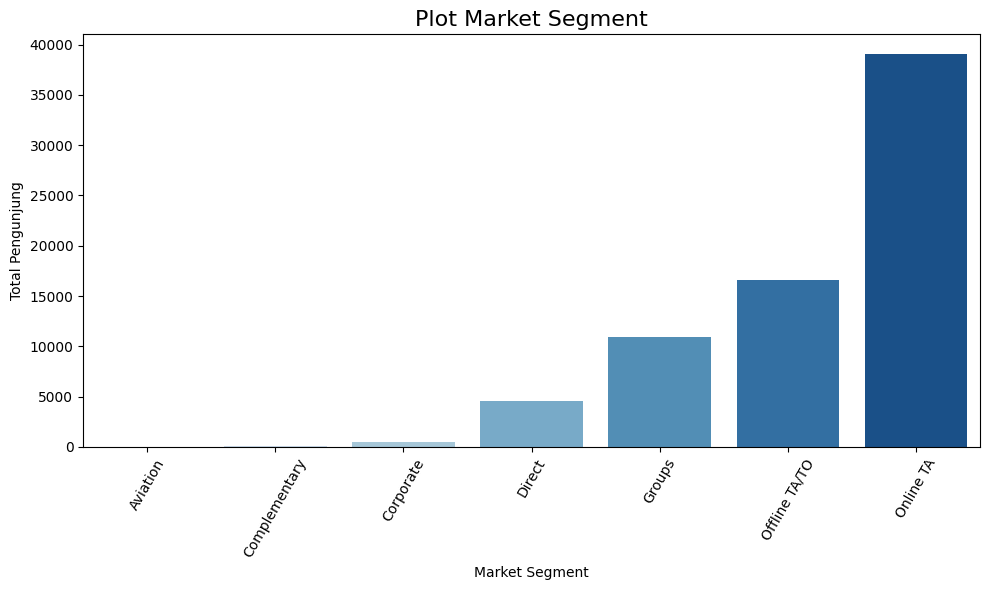

In [ ]:
# Menghitung jumlah segment market
df_market = copy_ui2.groupby('market_segment')['bookingID'].count().sort_values().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(data = df_market, x='market_segment', y='bookingID', palette='Blues')
# Mengatur label dan titlegb
plt.xlabel('Market Segment')
plt.xticks(rotation=60)
plt.ylabel('Total Pengunjung')
plt.title('Plot Market Segment', fontsize=16, fontweight='normal')

# Menambahkan grid dan layout yang rapi
#plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-27-1702945d862f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_market, x='meal', y='bookingID', palette='Blues')


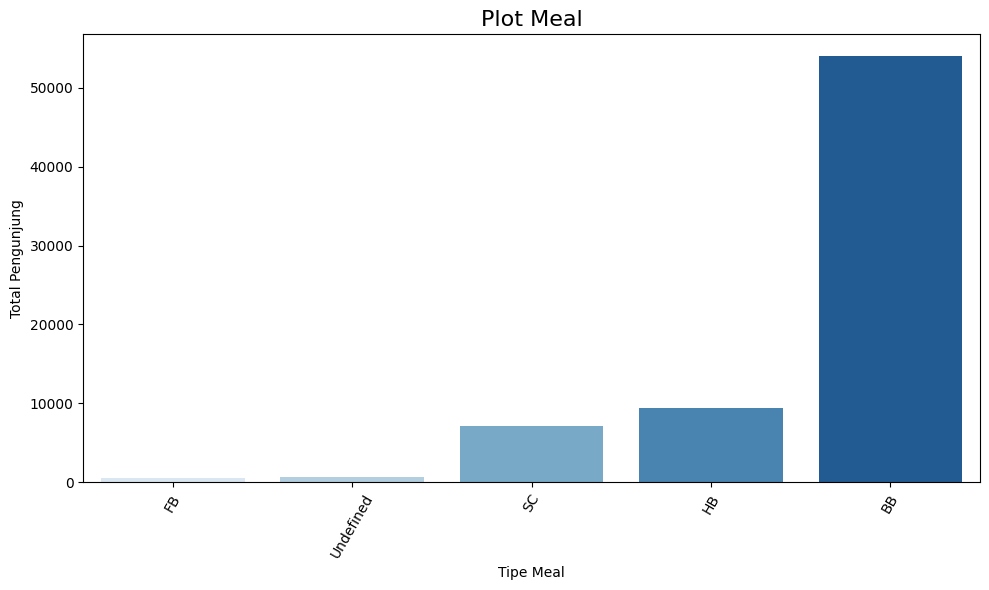

In [ ]:
# Menghitung jumlah tipe makanan
df_market = copy_ui2.groupby('meal')['bookingID'].count().sort_values().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(data = df_market, x='meal', y='bookingID', palette='Blues')
# Mengatur label dan titlegb
plt.xlabel('Tipe Meal')
plt.xticks(rotation=60)
plt.ylabel('Total Pengunjung')
plt.title('Plot Meal', fontsize=16, fontweight='normal')

# Menambahkan grid dan layout yang rapi
#plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-28-c81e1c9b0c6b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_market, x='distribution_channel', y='bookingID', palette='Blues')


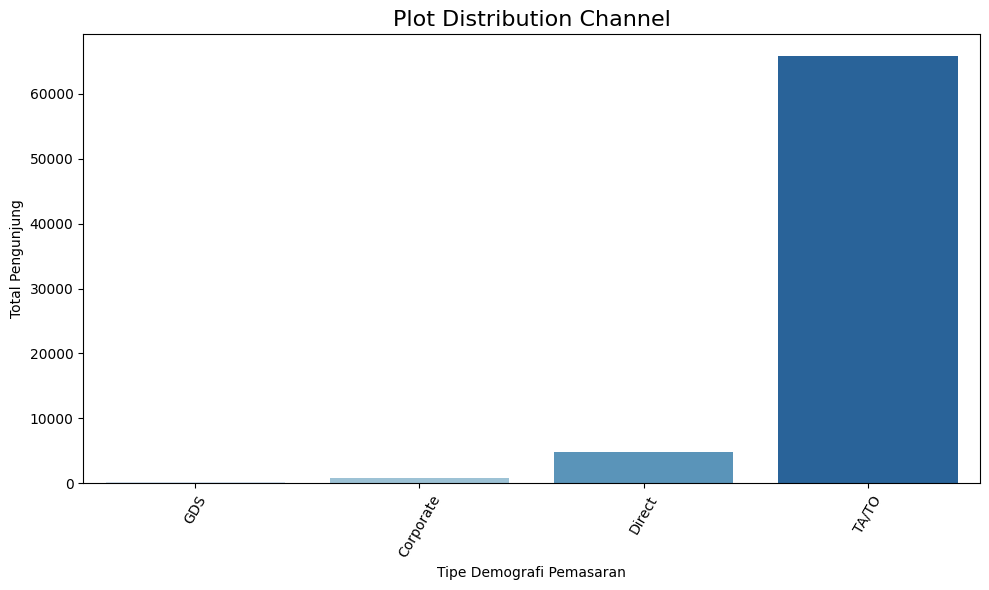

In [ ]:
# Menghitung jumlah tipe makanan
df_market = copy_ui2.groupby('distribution_channel')['bookingID'].count().sort_values().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(data = df_market, x='distribution_channel', y='bookingID', palette='Blues')
# Mengatur label dan titlegb
plt.xlabel('Tipe Demografi Pemasaran')
plt.xticks(rotation=60)
plt.ylabel('Total Pengunjung')
plt.title('Plot Distribution Channel', fontsize=16, fontweight='normal')

# Menambahkan grid dan layout yang rapi
#plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-29-31e1e0683754>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_market, x='customer_type', y='bookingID', palette='Blues')


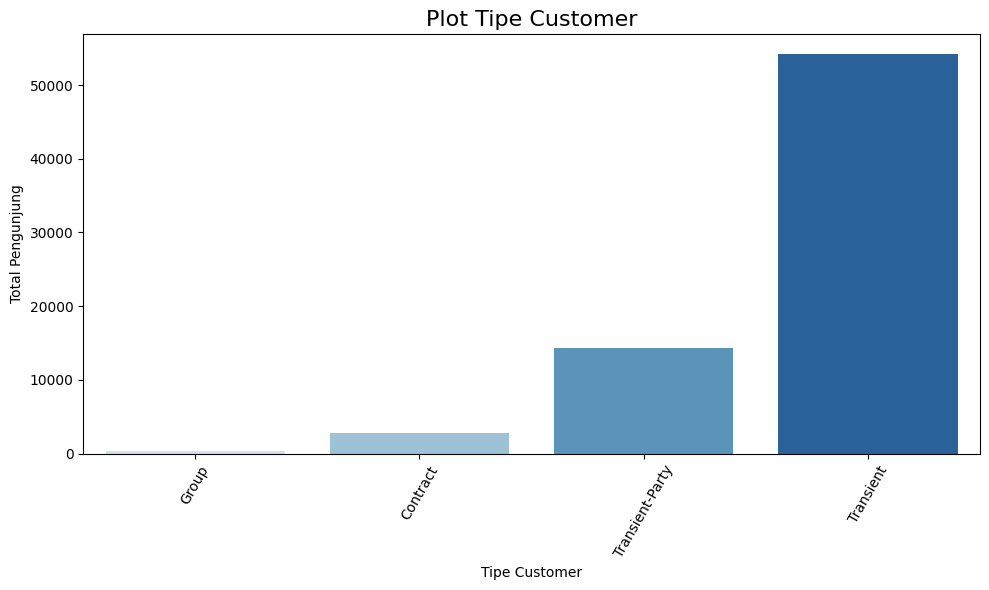

In [ ]:
# Menghitung jumlah tipe Customer
df_market = copy_ui2.groupby('customer_type')['bookingID'].count().sort_values().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(data = df_market, x='customer_type', y='bookingID', palette='Blues')
# Mengatur label dan titlegb
plt.xlabel('Tipe Customer')
plt.xticks(rotation=60)
plt.ylabel('Total Pengunjung')
plt.title('Plot Tipe Customer', fontsize=16, fontweight='normal')

# Menambahkan grid dan layout yang rapi
#plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-30-b0e34980fc7d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_market, x='deposit_type', y='bookingID', palette='Blues')


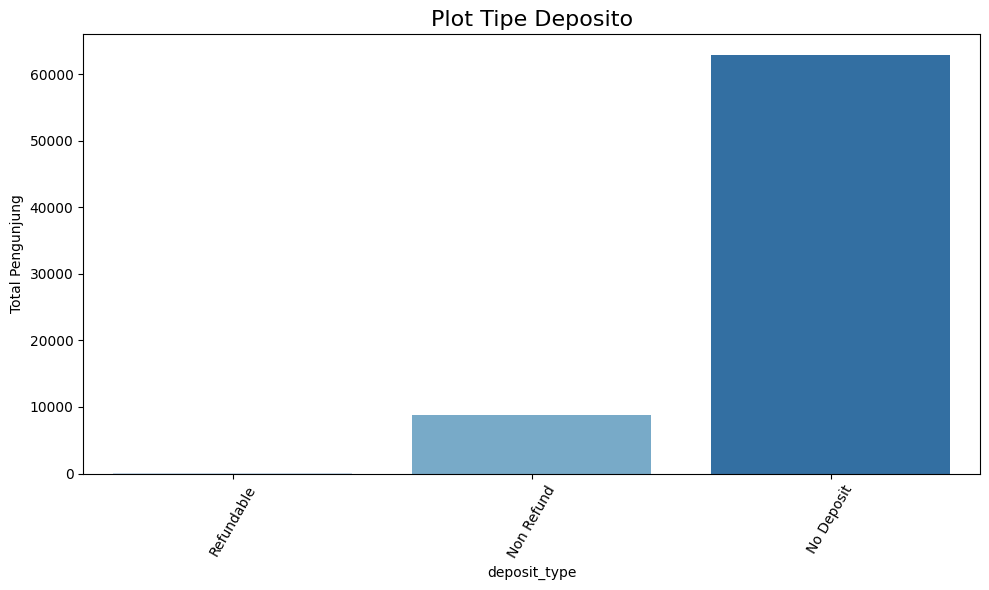

In [ ]:
# Menghitung jumlah deposit_type
df_market = copy_ui2.groupby('deposit_type')['bookingID'].count().sort_values().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(data = df_market, x='deposit_type', y='bookingID', palette='Blues')
# Mengatur label dan titlegb
plt.xlabel('deposit_type')
plt.xticks(rotation=60)
plt.ylabel('Total Pengunjung')
plt.title('Plot Tipe Deposito', fontsize=16, fontweight='normal')

# Menambahkan grid dan layout yang rapi
#plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-31-99d5438c82e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_market, x='reservation_status', y='bookingID', palette='Blues')


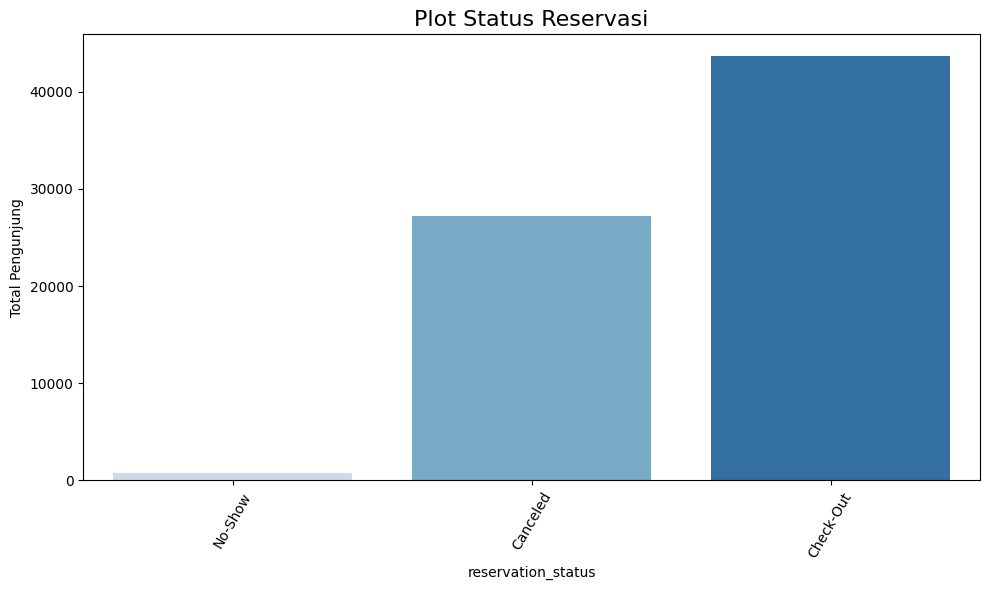

In [ ]:
# Menghitung jumlah status reservasi
df_market = copy_ui2.groupby('reservation_status')['bookingID'].count().sort_values().reset_index()

# Membuat plot
plt.figure(figsize=(10, 6))
sns.barplot(data = df_market, x='reservation_status', y='bookingID', palette='Blues')
# Mengatur label dan titlegb
plt.xlabel('reservation_status')
plt.xticks(rotation=60)
plt.ylabel('Total Pengunjung')
plt.title('Plot Status Reservasi', fontsize=16, fontweight='normal')

# Menambahkan grid dan layout yang rapi
#plt.grid(True)
plt.tight_layout()
plt.show()

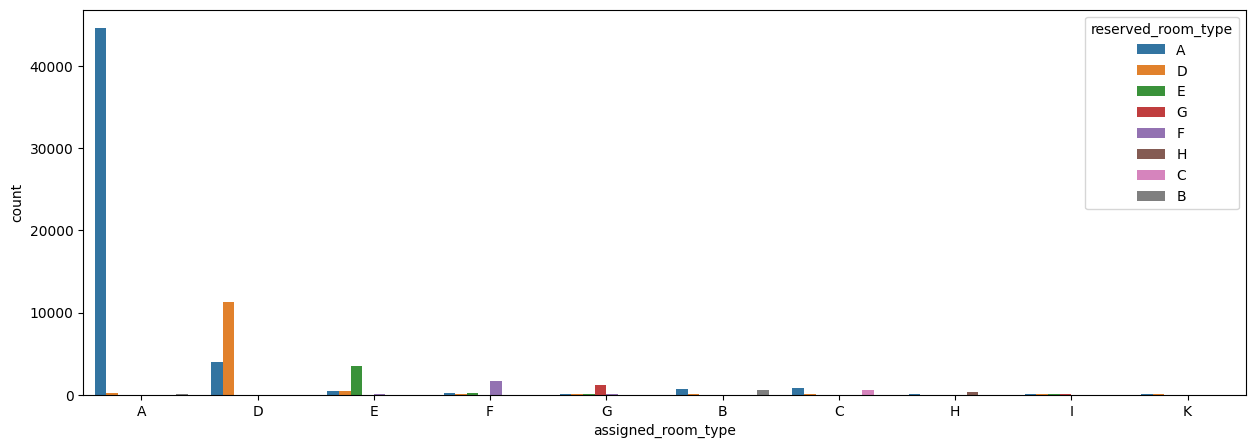

In [ ]:
plt.subplots(figsize=(15,5))
sns.countplot(x=copy_ui2['assigned_room_type'],order=copy_ui2['assigned_room_type'].value_counts().index, hue=copy_ui2['reserved_room_type'])
plt.show()

# Business Question

## No 1 Berapa persen pengunjung yang membatalkan pemesanan?

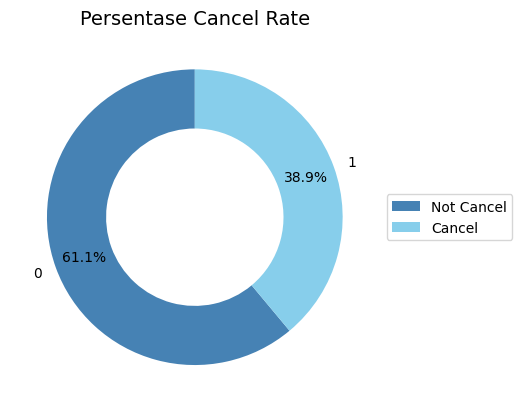

In [ ]:
values = copy_ui['is_canceled'].value_counts()
# Membuat pie chart
fig, ax = plt.subplots()
colors = ['steelblue', 'skyblue']
ax.pie(values, labels = values.index, autopct='%1.1f%%',
       startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.8)
ax.set_title('Persentase Cancel Rate', fontsize=14, fontweight='normal')
ax.legend(['Not Cancel', 'Cancel'], loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### 1. a. Segmentasi penjualan yang presentase cancelnya lebih besar?

In [ ]:
segment_rate = copy_ui.groupby('market_segment')['is_canceled'].mean().reset_index()
segment_rate


,market_segment,is_canceled
0,Aviation,0.250000
1,Complementary,0.130435
2,Corporate,0.245322
3,Direct,0.180440
4,Groups,0.636614
5,Offline TA/TO,0.337765
6,Online TA,0.368839


In [ ]:
# Hitung total dari kolom 'total_cust'
totalcancel = segment_rate['is_canceled'].sum()

# Buat list untuk menyimpan persentase
persen = []

# Lakukan iterasi berdasarkan setiap baris data
for i in range(segment_rate.shape[0]):
    pct = (segment_rate.iloc[i]['is_canceled'] / totalcancel) * 100  # Ambil nilai total_cust dengan iloc
    persen.append(round(pct, 2))  # Simpan hasil perhitungan persentase dengan pembulatan 2 desimal

# Tambahkan kolom 'persen' ke dataframe
segment_rate['persen'] = persen

# Tampilkan hasil
segment_rate.head()

,market_segment,is_canceled,persen
0,Aviation,0.250000,11.63
1,Complementary,0.130435,6.07
2,Corporate,0.245322,11.41
3,Direct,0.180440,8.39
4,Groups,0.636614,29.62


<ipython-input-29-a3b5f71b037b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  graph = sns.barplot(x='market_segment', y='is_canceled', data=segment_rate, palette = 'Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarni

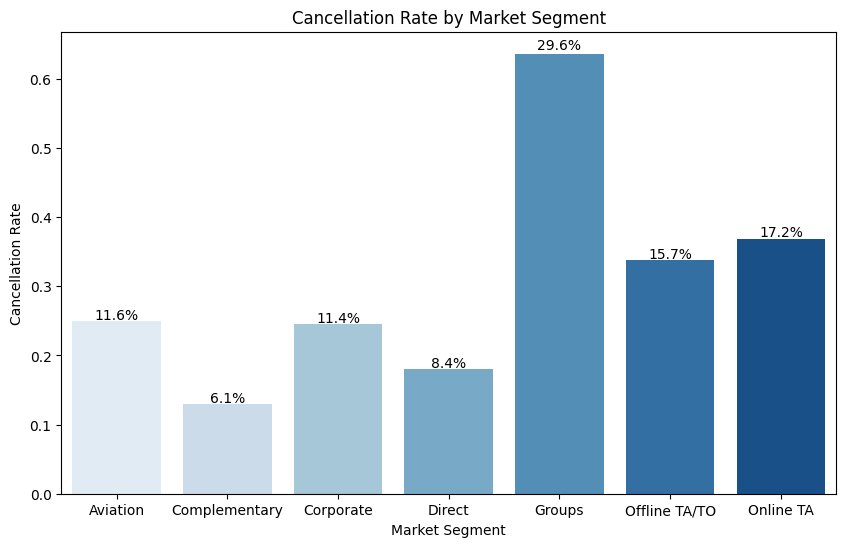

In [ ]:
plt.figure(figsize=(10, 6))
graph = sns.barplot(x='market_segment', y='is_canceled', data=segment_rate, palette = 'Blues')
plt.xlabel('Market Segment')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Market Segment')

# Add label persentase di atas setiap bar
for i, p in enumerate(graph.patches):
    # Dapatkan posisi x dan y dari bar
    lebar = p.get_width()
    tinggi = p.get_height()
    x, y = p.get_xy()

    # Check if the index is within the bounds of segment_rate.persen
    if i < len(segment_rate.persen):
        # Tempatkan label persentase di tengah atas setiap bar
        plt.text(x + lebar / 2,
                 y + tinggi * 1.01,  # Geser sedikit di atas bar
                 f'{segment_rate.persen[i]:.1f}%',  # Persen format dengan satu angka desimal
                 ha='center', weight='normal')
    else:
        print(f"Index error occurred at index {i}")
        break

### 1. b Berdasarkan week dan weekend, mana yang presentase cancelnya lebih besar?

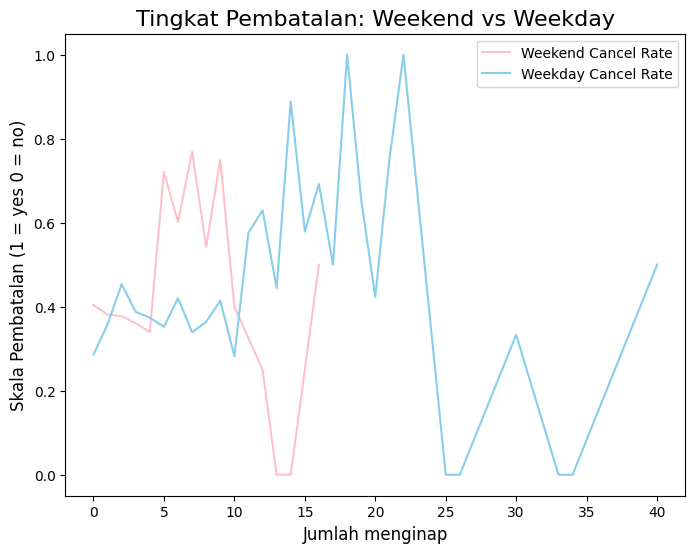

In [ ]:
#hitung tingkat cancel dari segment market
week_rate = copy_ui.groupby('stays_in_week_nights')['is_canceled'].mean()
weekend_rate = copy_ui.groupby('stays_in_weekend_nights')['is_canceled'].mean()

# Visualisasi tingkat pembatalan
plt.figure(figsize=(8, 6))
plt.plot(weekend_rate.index, weekend_rate.values, label='Weekend Cancel Rate', color='pink')
plt.plot(week_rate.index, week_rate.values, label='Weekday Cancel Rate', color='skyblue')

plt.title('Tingkat Pembatalan: Weekend vs Weekday', fontsize=16)
plt.xlabel('Jumlah menginap', fontsize=12)
plt.ylabel('Skala Pembatalan (1 = yes 0 = no)', fontsize=12)
plt.legend()

plt.show()

## No 2 Berapa persen pengunjung yang melakukan repeat stay?

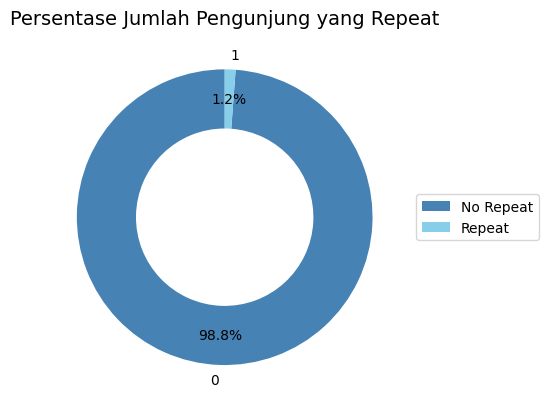

In [ ]:
values = copy_ui['is_repeated_guest'].value_counts()
# Membuat pie chart
fig, ax = plt.subplots()
colors = ['steelblue', 'skyblue']
ax.pie(values, labels = values.index, autopct='%1.1f%%',
       startangle=90, colors=colors, wedgeprops=dict(width=0.4), pctdistance=0.8)
ax.set_title('Persentase Jumlah Pengunjung yang Repeat', fontsize=14, fontweight='normal')
ax.legend(['No Repeat', 'Repeat'], loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

### 2. a. Segmentasi mana yang presentase repeat stay lebih besar?

<ipython-input-38-3592b4f29555>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=segment_rate, x='market_segment', y='is_repeated_guest', palette='Blues_r')


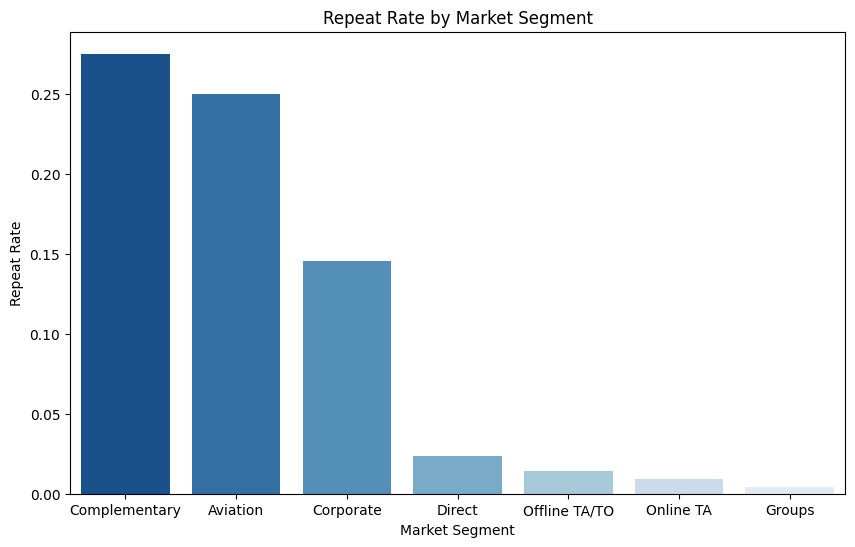

In [ ]:
#hitung tingkat repetation dari segment market
segment_rate = copy_ui.groupby('market_segment')['is_repeated_guest'].mean().sort_values(ascending = False)
# Convert the Series to a DataFrame
segment_rate = segment_rate.to_frame().reset_index()
#visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_rate, x='market_segment', y='is_repeated_guest', palette='Blues_r')
plt.xlabel('Market Segment')
plt.ylabel('Repeat Rate')
plt.title('Repeat Rate by Market Segment')
plt.show()

## No 3 Berapa lama rata-rata pengunjung menginap, Paling lama berapa malam dan dari negara mana?

In [ ]:
copy_ui['total_nginep'] = copy_ui['stays_in_weekend_nights'] + copy_ui['stays_in_week_nights']

In [ ]:
request_cust = (copy_ui
            .groupby(['country'])
            .agg(rata_total_bermalam=('total_nginep','mean'))
            .reset_index()
            .sort_values('rata_total_bermalam',ascending=False)
            .head(10)
            )
request_cust

,country,rata_total_bermalam
52,FRO,12.000000
1,AGO,9.817259
131,SEN,8.125000
142,TGO,8.000000
59,GNB,7.500000
56,GHA,7.333333
121,PLW,7.000000
133,SLE,7.000000
98,MKD,6.000000
104,MRT,6.000000


In [ ]:
request_cust = (copy_ui
            .groupby(['country'])
            .agg(max_bermalam = ('total_nginep', 'max'))
            .reset_index()
            .sort_values('max_bermalam',ascending=False)
            .head(10)
            )
request_cust

,country,max_bermalam
124,PRT,56
54,GBR,56
46,ESP,46
38,DEU,42
139,SWE,30
128,RUS,30
1,AGO,30
29,CN,29
51,FRA,29
49,FIN,28


## No 4 Berapa jumlah customer yang checkout (no cancel) sepanjang 3 tahun ini?

In [ ]:
tahun_customer = copy_ui[copy_ui['is_canceled'] == 0 ]

In [ ]:
urutin = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
tahun_customer['arrival_date_month'] = pd.Categorical(tahun_customer['arrival_date_month'], categories = urutin, ordered = True)

<ipython-input-43-ee818ab90a61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tahun_customer['arrival_date_month'] = pd.Categorical(tahun_customer['arrival_date_month'], categories = urutin, ordered = True)


In [ ]:
tahun_cust = (tahun_customer
            .groupby(['arrival_date_year', 'arrival_date_month'])
            .agg(total_cust = ('bookingID', 'count'))
            .reset_index()
            .sort_values('total_cust',ascending=False)
            )
tahun_cust

<ipython-input-44-1f684df8bf36>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['arrival_date_year', 'arrival_date_month'])


,arrival_date_year,arrival_date_month,total_cust
28,2019,May,2131
30,2019,July,2117
20,2018,September,2095
16,2018,May,2081
15,2018,April,2058
17,2018,June,2041
21,2018,October,2017
31,2019,August,2017
19,2018,August,2016
29,2019,June,1979


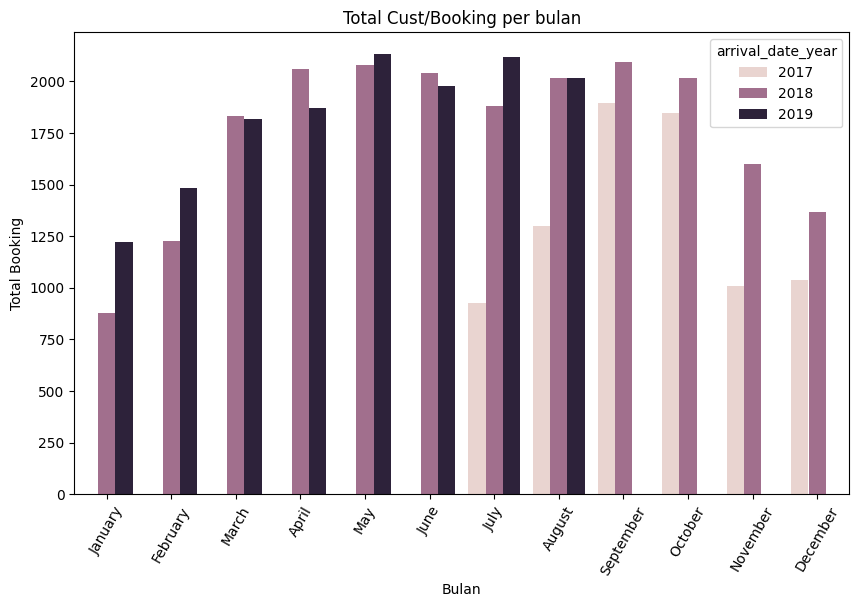

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tahun_cust, x='arrival_date_month', y='total_cust', hue = 'arrival_date_year')
plt.xlabel('Bulan')
plt.ylabel('Total Booking')
plt.xticks(rotation=60)
plt.title('Total Cust/Booking per bulan')
plt.show()

## No 5 Berapa malam customer menginap

In [ ]:
request_cust = (copy_ui
            .groupby(['total_nginep'])
            .agg(jumlah_pengunjung = ('bookingID', 'count'),
                 total_adr = ('adr', 'mean'))
            .reset_index()
            .sort_values('jumlah_pengunjung',ascending=False)
            .head(10)
            )
request_cust

,total_nginep,jumlah_pengunjung,total_adr
2,2,16921,100.148349
3,3,16890,106.725937
4,4,11054,106.580937
1,1,9993,101.461927
7,7,5691,103.096391
5,5,4960,114.520605
6,6,2482,121.944714
10,10,725,108.082869
8,8,723,116.755131
14,14,610,93.244492


## No 6 Berapa jumlah sekali booking terbanyak

In [ ]:
booking = (copy_ui
            .groupby(['previous_bookings_not_canceled'])
            .agg(total_cust = ('bookingID', 'count'),
                 total_adr = ('adr', 'mean'))
            .reset_index()
            .sort_values('total_cust',ascending=False)
            .head(10)
            )
booking

,previous_bookings_not_canceled,total_cust,total_adr
0,0,70928,104.943344
1,1,423,86.923664
2,2,115,72.254957
3,3,43,58.634651
4,4,30,65.137667
5,5,25,56.379200
6,6,12,74.404167
7,7,9,49.711111
8,8,6,34.066667
9,9,6,61.666667


## Berapa persen pertumbuhan bisnis dari tahun 2018 ke 2019 jika dilihat dari total reservasi dan pendapatan (ADR)

In [ ]:
tahun_1819 = copy_ui[copy_ui['arrival_date_year'] >= 2018 ]

In [ ]:
# Membuat batas perhitungan berdasarkan jumlah booking/reservasi
kampanye_start = '2019-01-01'

# Menghitung jumlah reservasi tahun 2018
reservasi_sebelum = tahun_1819[tahun_1819['reservation_status_date'] < kampanye_start].groupby('reservation_status_date').size().sum()

# Menghitung jumlah reservasi tahun 2018
reservasi_setelah = tahun_1819[tahun_1819['reservation_status_date'] >= kampanye_start].groupby('reservation_status_date').size().sum()

# Perbandingan
print(f"Jumlah reservasi tahun 2018: {reservasi_sebelum}")
print(f"Jumlah reservasi tahun 2019: {reservasi_setelah}")


Jumlah reservasi tahun 2018: 36805
Jumlah reservasi tahun 2019: 21752


In [ ]:
(21752/(36805+21752))*100

37.146711750943524

In [ ]:
# Misalkan ada kolom 'deposit_type'
pemasaran_sebelum = tahun_1819[tahun_1819['reservation_status_date'] < kampanye_start]['deposit_type'].value_counts()
pemasaran_setelah = tahun_1819[tahun_1819['reservation_status_date'] >= kampanye_start]['deposit_type'].value_counts()

# Perbandingan
print("Distribusi tahun 2018:")
print(pemasaran_sebelum)

print("\nDistribusi tahun 2019:")
print(pemasaran_setelah)


Distribusi tahun 2018:
deposit_type
No Deposit    31268
Non Refund     5521
Refundable       16
Name: count, dtype: int64

Distribusi tahun 2019:
deposit_type
No Deposit    20850
Non Refund      889
Refundable       13
Name: count, dtype: int64


In [ ]:
# Menghitung total pendapatan sebelum dan setelah 2018
revenue_sebelum = tahun_1819[tahun_1819['reservation_status_date'] < kampanye_start]['adr'].sum()
revenue_setelah = tahun_1819[tahun_1819['reservation_status_date'] >= kampanye_start]['adr'].sum()

print(f"Pendapatan tahun 2018: {revenue_sebelum}")
print(f"Pendapatan tahun 2019: {revenue_setelah}")


Pendapatan tahun 2018: 3702729.42
Pendapatan tahun 2019: 2642339.71


In [ ]:
(2642339.71/(2642339.71+3702729.42))*100

41.6439861546473

Pertumbuhan ADR ditahun 2019 sekitar 41% jika dibandingkan dengan 2018 yang mana genap 12 bulan penjualan/reservasi. Dengan menerapkan model serta insight bisnis diharapkan ditahun 2019 memiliki penjualan lebih dari 41% jika dibandingkan penjualan 2018.